Import Library


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import json
import re
import os

# **DATA WRANGLING**

# 0. Geo Mapping (Zip, FIPS, County, MSA, State)

## 0.1 Zip FIPS Mapping


In [59]:
%%capture
!pip instsall kaggle

# !mkdir ~/.kaggle
# !cp \\nasprodpm\home\jyan\kaggle.json ~/.kaggle/

# !!kaggle datasets download danofer/zipcodes-county-fips-crosswalk

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [62]:
!!kaggle datasets download danofer/zipcodes-county-fips-crosswalk


['Dataset URL: https://www.kaggle.com/datasets/danofer/zipcodes-county-fips-crosswalk',
 'License(s): CC0-1.0',
 'zipcodes-county-fips-crosswalk.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [63]:
!unzip zipcodes-county-fips-crosswalk.zip

Archive:  zipcodes-county-fips-crosswalk.zip
replace ZIP-COUNTY-FIPS_2017-06.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [64]:
zip_fips_df = pd.read_csv('ZIP-COUNTY-FIPS_2017-06.csv')
zip_fips_df.info()
zip_fips_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP         52889 non-null  int64 
 1   COUNTYNAME  52889 non-null  object
 2   STATE       52889 non-null  object
 3   STCOUNTYFP  52889 non-null  int64 
 4   CLASSFP     52889 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [65]:
unique_fips = zip_fips_df['STCOUNTYFP'].nunique()
print(f"Unique FIPS codes: {unique_fips}")

# Drop NaNs and get unique FIPS codes as a list
unique_fips_list = zip_fips_df['STCOUNTYFP'].dropna().unique().tolist()

# Display the list
print(unique_fips_list)

Unique FIPS codes: 3223
[1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017, 1019, 1021, 1023, 1025, 1027, 1029, 1031, 1033, 1035, 1037, 1039, 1041, 1043, 1045, 1047, 1049, 1051, 1053, 1055, 1057, 1059, 1061, 1063, 1065, 1067, 1069, 1071, 1073, 1075, 1077, 1079, 1081, 1083, 1085, 1087, 1089, 1091, 1093, 1095, 1097, 1099, 1101, 1103, 1105, 1107, 1109, 1111, 1113, 1115, 1117, 1119, 1121, 1123, 1125, 1127, 1129, 1131, 1133, 2013, 2016, 2020, 2050, 2060, 2068, 2070, 2090, 2100, 2105, 2110, 2122, 2130, 2150, 2164, 2170, 2180, 2185, 2188, 2195, 2198, 2220, 2230, 2240, 2261, 2270, 2275, 2282, 2290, 4001, 4003, 4005, 4007, 4009, 4011, 4012, 4013, 4015, 4017, 4019, 4021, 4023, 4025, 4027, 5001, 5003, 5005, 5007, 5009, 5011, 5013, 5015, 5017, 5019, 5021, 5023, 5025, 5027, 5029, 5031, 5033, 5035, 5037, 5039, 5041, 5043, 5045, 5047, 5049, 5051, 5053, 5055, 5057, 5059, 5061, 5063, 5065, 5067, 5069, 5071, 5073, 5075, 5077, 5079, 5081, 5083, 5085, 5087, 5089, 5091, 5093, 5095, 5097, 5099, 5101, 510

In [66]:
# Convert FIPS to 5-digit string
zip_fips_df['fips_string'] = zip_fips_df['STCOUNTYFP'].astype(str).str.zfill(5)

In [67]:
unique_fips_list_5 = zip_fips_df['fips_string'].dropna().unique().tolist()
print(unique_fips_list_5)

['01001', '01003', '01005', '01007', '01009', '01011', '01013', '01015', '01017', '01019', '01021', '01023', '01025', '01027', '01029', '01031', '01033', '01035', '01037', '01039', '01041', '01043', '01045', '01047', '01049', '01051', '01053', '01055', '01057', '01059', '01061', '01063', '01065', '01067', '01069', '01071', '01073', '01075', '01077', '01079', '01081', '01083', '01085', '01087', '01089', '01091', '01093', '01095', '01097', '01099', '01101', '01103', '01105', '01107', '01109', '01111', '01113', '01115', '01117', '01119', '01121', '01123', '01125', '01127', '01129', '01131', '01133', '02013', '02016', '02020', '02050', '02060', '02068', '02070', '02090', '02100', '02105', '02110', '02122', '02130', '02150', '02164', '02170', '02180', '02185', '02188', '02195', '02198', '02220', '02230', '02240', '02261', '02270', '02275', '02282', '02290', '04001', '04003', '04005', '04007', '04009', '04011', '04012', '04013', '04015', '04017', '04019', '04021', '04023', '04025', '04027', 

In [68]:
# Unique ZIPs (based on ZIP_STRING or ZIP)
unique_zips = zip_fips_df['ZIP'].nunique()

# Unique FIPS (excluding NaNs)
unique_fips = zip_fips_df['fips_string'].nunique()

print(f"Unique ZIP codes: {unique_zips}")
print(f"Unique FIPS codes: {unique_fips}")

Unique ZIP codes: 39456
Unique FIPS codes: 3223


In [69]:
# Clean Zip as 5-digit string
zip_fips_df["ZIP"] = zip_fips_df["ZIP"].apply(lambda x: f"{int(x):05}")

# Rename columns
zip_fips_df = zip_fips_df.rename(columns={"COUNTYNAME": "county_name"})

# Drop useless columns
zip_fips_df = zip_fips_df.drop(columns=['CLASSFP'])

# Convert column names to lower case
zip_fips_df.columns = zip_fips_df.columns.str.lower()

zip_fips_df.info()
zip_fips_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   zip          52889 non-null  object
 1   county_name  52889 non-null  object
 2   state        52889 non-null  object
 3   stcountyfp   52889 non-null  int64 
 4   fips_string  52889 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


,zip,county_name,state,stcountyfp,fips_string
0,36003,Autauga County,AL,1001,01001
1,36006,Autauga County,AL,1001,01001
2,36067,Autauga County,AL,1001,01001
3,36066,Autauga County,AL,1001,01001
4,36703,Autauga County,AL,1001,01001


In [208]:
# Deduplicate zip_fips mapping
zip_fips_df_dedup = zip_fips_df.sort_values(by=["zip", "fips_string"]).drop_duplicates(subset=["zip"], keep="first")
zip_fips_df_dedup["zip_code"] = zip_fips_df_dedup["zip"].apply(lambda x: f"{int(x):05}")
zip_fips_df_dedup = zip_fips_df_dedup.drop(columns=["zip"])  # drop redundant


In [209]:
zip_fips_df_dedup.info()
zip_fips_df_dedup.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 39456 entries, 32368 to 1333
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   county_name  39456 non-null  object
 1   state        39456 non-null  object
 2   stcountyfp   39456 non-null  int64 
 3   fips_string  39456 non-null  object
 4   zip_code     39456 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


,county_name,state,stcountyfp,fips_string,zip_code
32368,Suffolk County,NY,36103,36103,00501
52575,Adjuntas Municipio,PR,72001,72001,00601
52576,Aguada Municipio,PR,72003,72003,00602
52579,Aguadilla Municipio,PR,72005,72005,00603
52580,Aguadilla Municipio,PR,72005,72005,00604


## 0.2 Zip MSA Mapping

In [70]:
import pandas as pd
file_path = '/content/drive/MyDrive/fs11_gpci_by_msa-ZIP.xls'

# Define the file path

# file_path = '/home/jyan/fs11_gpci_by_msa-ZIP.xls' # Use a raw string


# Read the Excel file
zip_MSA_df = pd.read_excel(file_path)
zip_MSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43508 entries, 0 to 43507
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ZIP CODE    43508 non-null  int64  
 1   STATE       43508 non-null  object 
 2   MSA No.     43497 non-null  float64
 3   GPCI        43497 non-null  float64
 4   GPCI.1      43497 non-null  float64
 5   GPCI.2      43497 non-null  float64
 6   County No.  43496 non-null  float64
 7   Unnamed: 7  43508 non-null  int64  
 8   MSA Name    43497 non-null  object 
 9   Unnamed: 9  6 non-null      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 3.3+ MB


In [71]:
# Clean Zip as 5-digit string
zip_MSA_df["ZIP CODE"] = zip_MSA_df["ZIP CODE"].apply(lambda x: f"{int(x):05}")
zip_MSA_df = zip_MSA_df.rename(columns={"ZIP CODE": "ZIP_code"})

# Rename Columns: Unnamed:7 into zip_no as int64
zip_MSA_df = zip_MSA_df.rename(columns={"Unnamed: 7": "zip_no"})
zip_MSA_df = zip_MSA_df.rename(columns={"MSA Name": "msa_name"})

# Convert county No. as int64 and rename field
zip_MSA_df["county_no"] = zip_MSA_df["County No."].fillna(0).astype("int64")

# Drop meaningless or repetitive columns
columns_to_drop = ["MSA No.", "GPCI", "GPCI.1", "GPCI.2", "County No.", "Unnamed: 9", "STATE"]
zip_MSA_df = zip_MSA_df.drop(columns=columns_to_drop)

# Convert column names to lower case
zip_MSA_df.columns = zip_MSA_df.columns.str.lower()

In [72]:
zip_MSA_df.head(5)

,zip_code,zip_no,msa_name,county_no
0,00210,210,"Boston-Cambridge-Quincy, MA-NH MSA",15
1,00211,211,"Boston-Cambridge-Quincy, MA-NH MSA",15
2,00212,212,"Boston-Cambridge-Quincy, MA-NH MSA",15
3,00213,213,"Boston-Cambridge-Quincy, MA-NH MSA",15
4,00214,214,"Boston-Cambridge-Quincy, MA-NH MSA",15


## 0.3 Merge & Check Effectivenss of Merge


In [73]:
# Check the number of rows before merge
print("Rows in zip_MSA_df before merge:", len(zip_MSA_df))
print("Rows in zip_fips_df before merge:", len(zip_fips_df))

Rows in zip_MSA_df before merge: 43508
Rows in zip_fips_df before merge: 52889


In [74]:
merged_zip_fips_MSA_df = pd.merge(zip_MSA_df, zip_fips_df, left_on='zip_code', right_on='zip', how='inner')

In [75]:
# Rows from zip_MSA_df that didn't merge
unmatched_zip_MSA = merged_zip_fips_MSA_df[merged_zip_fips_MSA_df['zip'].isna()]

# Rows from zip_fips_df that didn't merge
unmatched_zip_fips = merged_zip_fips_MSA_df[merged_zip_fips_MSA_df['zip_code'].isna()]

print("Unmatched rows from zip_MSA_df:", unmatched_zip_MSA)
print("Unmatched rows from zip_fips_df:", unmatched_zip_fips)

Unmatched rows from zip_MSA_df: Empty DataFrame
Columns: [zip_code, zip_no, msa_name, county_no, zip, county_name, state, stcountyfp, fips_string]
Index: []
Unmatched rows from zip_fips_df: Empty DataFrame
Columns: [zip_code, zip_no, msa_name, county_no, zip, county_name, state, stcountyfp, fips_string]
Index: []


In [76]:
merged_zip_fips_MSA_df.info()

print("Rows in merged_zip_fips_MSA_df after merge :", len(merged_zip_fips_MSA_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52856 entries, 0 to 52855
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   zip_code     52856 non-null  object
 1   zip_no       52856 non-null  int64 
 2   msa_name     52856 non-null  object
 3   county_no    52856 non-null  int64 
 4   zip          52856 non-null  object
 5   county_name  52856 non-null  object
 6   state        52856 non-null  object
 7   stcountyfp   52856 non-null  int64 
 8   fips_string  52856 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.6+ MB
Rows in merged_zip_fips_MSA_df after merge : 52856


In [77]:
merged_zip_fips_MSA_df.head(10)

,zip_code,zip_no,msa_name,county_no,zip,county_name,state,stcountyfp,fips_string
0,00501,501,"New York-Northern New Jersey-Long Island, NY-N...",103,00501,Suffolk County,NY,36103,36103
1,00601,601,PR NONMETROPOLITAN AREA,1,00601,Adjuntas Municipio,PR,72001,72001
2,00601,601,PR NONMETROPOLITAN AREA,1,00601,Ponce Municipio,PR,72113,72113
3,00602,602,"Aguadilla-Isabela-San Sebastian, PR MSA",3,00602,Aguada Municipio,PR,72003,72003
4,00602,602,"Aguadilla-Isabela-San Sebastian, PR MSA",3,00602,Aguadilla Municipio,PR,72005,72005
5,00603,603,"Aguadilla-Isabela-San Sebastian, PR MSA",5,00603,Aguadilla Municipio,PR,72005,72005
6,00603,603,"Aguadilla-Isabela-San Sebastian, PR MSA",5,00603,Isabela Municipio,PR,72071,72071
7,00604,604,"Aguadilla-Isabela-San Sebastian, PR MSA",5,00604,Aguadilla Municipio,PR,72005,72005
8,00605,605,"Aguadilla-Isabela-San Sebastian, PR MSA",5,00605,Aguadilla Municipio,PR,72005,72005
9,00606,606,PR NONMETROPOLITAN AREA,93,00606,Maricao Municipio,PR,72093,72093


# 1. County Demographics Data Cleaning and Wrangling


## 1.1 Loading County Demogrphics Dataset

In [78]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("glozab/county-level-us-demographic-data-1990-2020")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/county-level-us-demographic-data-1990-2020


In [79]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['county_demographics.csv']


In [80]:
file_path = os.path.join(path, 'county_demographics.csv')

# file_path = '/home/jyan/county_demographics.csv'
county_demographics_df_raw = pd.read_csv(file_path)

county_demographics_df_raw.head()
# county_demographics_df_raw.describe()


,year,fips,population,w_population,b_population,o_population,nh_population,hi_population,na_population,male_population,...,age9_population_ratio,age10_population_ratio,age11_population_ratio,age12_population_ratio,age13_population_ratio,age14_population_ratio,age15_population_ratio,age16_population_ratio,age17_population_ratio,age18_population_ratio
0,1990,1025,27289,15579,11643,35,27196,93,0,13052,...,0.06263,0.05552,0.04998,0.04482,0.04167,0.03767,0.03324,0.02825,0.01843,0.01319
1,1990,1031,40293,32869,6950,160,39831,462,0,19673,...,0.07455,0.06031,0.05180,0.04894,0.04544,0.04145,0.03430,0.02730,0.01660,0.01258
2,1990,1041,13598,10068,3516,11,13576,22,0,6421,...,0.06582,0.05354,0.04574,0.04765,0.05104,0.05273,0.04633,0.03876,0.02456,0.01839
3,1990,1053,35526,24377,10050,1045,35378,148,0,17454,...,0.06820,0.05694,0.05174,0.04771,0.04712,0.04141,0.03502,0.02911,0.01942,0.01368
4,1990,1101,209537,119702,87856,415,207933,1604,0,98854,...,0.06966,0.05219,0.04392,0.04111,0.03967,0.03757,0.02881,0.02294,0.01483,0.01145


## 1.2 County Demographics Dataset Cleaning

In [81]:
county_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     97287 non-null  int64  
 1   fips                     97287 non-null  int64  
 2   population               97287 non-null  int64  
 3   w_population             97287 non-null  int64  
 4   b_population             97287 non-null  int64  
 5   o_population             97287 non-null  int64  
 6   nh_population            97287 non-null  int64  
 7   hi_population            97287 non-null  int64  
 8   na_population            97287 non-null  int64  
 9   male_population          97287 non-null  int64  
 10  female_population        97287 non-null  int64  
 11  age0_population          97287 non-null  int64  
 12  age1_population          97287 non-null  int64  
 13  age2_population          97287 non-null  int64  
 14  age3_population       

In [82]:
#check how many missing values are in each column
# county_demographics_df_raw.isna().sum().sort_values(ascending=False)

In [83]:
# keep the necessary columns
county_demographics_df_raw = county_demographics_df_raw.drop(columns = ['population', 'female_population', 'male_population', 'w_population', 'b_population', 'o_population', 'nh_population', 'hi_population', 'na_population',
                                           'age0_population', 'age1_population', 'age2_population', 'age3_population', 'age4_population', 'age5_population',
                                           'age6_population', 'age7_population', 'age8_population', 'age9_population', 'age10_population', 'age11_population',
                                           'age12_population', 'age13_population', 'age14_population', 'age15_population', 'age16_population', 'age17_population',
                                           'age18_population'])

In [84]:
county_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     97287 non-null  int64  
 1   fips                     97287 non-null  int64  
 2   w_population_ratio       97287 non-null  float64
 3   b_population_ratio       97287 non-null  float64
 4   o_population_ratio       97287 non-null  float64
 5   nh_population_ratio      97287 non-null  float64
 6   hi_population_ratio      97287 non-null  float64
 7   na_population_ratio      97287 non-null  float64
 8   male_population_ratio    97287 non-null  float64
 9   female_population_ratio  97287 non-null  float64
 10  age0_population_ratio    97287 non-null  float64
 11  age1_population_ratio    97287 non-null  float64
 12  age2_population_ratio    97287 non-null  float64
 13  age3_population_ratio    97287 non-null  float64
 14  age4_population_ratio 

### 1.2.1 Rename Columns for Consistency

In [85]:
county_demographics_df_raw.columns = county_demographics_df_raw.columns.str.strip().str.lower().str.replace(' ', '_')

In [86]:
# Rename age groups
county_demographics_df_renamed = county_demographics_df_raw
county_demographics_df_renamed.rename(
    columns=
     {
    'w_population_ratio': 'caucasion_population_ratio',
    'b_population_ratio': 'African-American_population_ratio',
    'o_population_ratio': 'other_race_population_ratio',
    'nh_population_ratio':'non-Hispanic_population_ratio',
    'hi_population_ratio':'hispanic_population_ratio',
    'na_population_ratio':'other_origin_population_ratio',
    'age0_population_ratio':'age_less_1_population_ratio',
    'age1_population_ratio':'age_1_to_4_population_ratio',
    'age2_population_ratio':'age_5_to_9_population_ratio',
    'age3_population_ratio':'age_10_to_14_population_ratio',
    'age4_population_ratio':'age_15_to_19_population_ratio',
    'age5_population_ratio':'age_20_to_24_population_ratio',
    'age6_population_ratio':'age_25_to_29_population_ratio',
    'age7_population_ratio':'age_30_to_34_population_ratio',
    'age8_population_ratio':'age_35_to_39_population_ratio',
    'age9_population_ratio':'age_40_to_44_population_ratio',
    'age10_population_ratio':'age_45_to_49_population_ratio',
    'age11_population_ratio':'age_50_to_54_population_ratio',
    'age12_population_ratio':'age_55_to_59_population_ratio',
    'age13_population_ratio':'age_60_to_64_population_ratio',
    'age14_population_ratio':'age_65_to_69_population_ratio',
    'age15_population_ratio':'age_70_to_74_population_ratio',
    'age16_population_ratio':'age_75_to_79_population_ratio',
    'age17_population_ratio':'age_80_to_84_population_ratio',
    'age18_population_ratio':'age_85_and_over_population_ratio'
    }, inplace=True)

In [87]:
county_demographics_df_renamed.reset_index(drop=True, inplace=True)
county_demographics_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   other_origin_population_ratio      97287 non-null  float64
 8   male_population_ratio              97287 non-null  float64
 9   female_population_ratio            97287 non-null  float64
 10  age_less_1_population_ratio        97287 non-null  float64
 11  age_1_to_4_population_ratio        97287 non-null  flo

In [88]:
# Group Age Groups
county_demographics_df_renamed['age_0_to_19_population_ratio'] = county_demographics_df_renamed[[
    'age_less_1_population_ratio',
    'age_1_to_4_population_ratio',
    'age_5_to_9_population_ratio',
    'age_10_to_14_population_ratio',
    'age_15_to_19_population_ratio']].sum(axis=1)

county_demographics_df_renamed['age_20_to_39_population_ratio'] = county_demographics_df_renamed[[
    'age_20_to_24_population_ratio',
    'age_25_to_29_population_ratio',
    'age_30_to_34_population_ratio',
    'age_35_to_39_population_ratio']].sum(axis=1)

county_demographics_df_renamed['age_40_to_59_population_ratio'] = county_demographics_df_renamed[[
    'age_40_to_44_population_ratio',
    'age_45_to_49_population_ratio',
    'age_50_to_54_population_ratio',
    'age_55_to_59_population_ratio']].sum(axis=1)

county_demographics_df_renamed['age_60_to_79_population_ratio'] = county_demographics_df_renamed[[
    'age_60_to_64_population_ratio',
    'age_65_to_69_population_ratio',
    'age_70_to_74_population_ratio',
    'age_75_to_79_population_ratio']].sum(axis=1)

county_demographics_df_renamed['age_80_and_over_population_ratio'] = county_demographics_df_renamed[[
    'age_80_to_84_population_ratio',
    'age_85_and_over_population_ratio']].sum(axis=1)

In [89]:
county_demographics_grouped_df = county_demographics_df_renamed[['year',
                                                                 'fips',
                                                                 'caucasion_population_ratio',
                                                                 'African-American_population_ratio',
                                                                 'other_race_population_ratio',
                                                                 'non-Hispanic_population_ratio',
                                                                 'hispanic_population_ratio',
                                                                 'male_population_ratio',
                                                                 'female_population_ratio',
                                                                 'age_0_to_19_population_ratio',
                                                                 'age_20_to_39_population_ratio',
                                                                 'age_40_to_59_population_ratio',
                                                                 'age_60_to_79_population_ratio',
                                                                 'age_80_and_over_population_ratio'
                                                                ]]

county_demographics_grouped_df.head()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,0.28386,0.21295,0.14083,0.03162
1,1990,1031,0.81575,0.17249,0.00397,0.98853,0.01147,0.48825,0.51175,0.28436,0.30236,0.23560,0.14849,0.02918
2,1990,1041,0.74040,0.25857,0.00081,0.99838,0.00162,0.47220,0.52780,0.29334,0.26210,0.21275,0.18886,0.04295
3,1990,1053,0.68617,0.28289,0.02942,0.99583,0.00417,0.49130,0.50870,0.29682,0.29283,0.22459,0.15266,0.03310
4,1990,1101,0.57127,0.41929,0.00198,0.99235,0.00765,0.47177,0.52823,0.30814,0.32970,0.20688,0.12899,0.02628


In [90]:
county_demographics_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   male_population_ratio              97287 non-null  float64
 8   female_population_ratio            97287 non-null  float64
 9   age_0_to_19_population_ratio       97287 non-null  float64
 10  age_20_to_39_population_ratio      97287 non-null  float64
 11  age_40_to_59_population_ratio      97287 non-null  flo

 ### 1.2.2 Handle Duplicates

In [91]:
county_demographics_df = county_demographics_grouped_df.drop_duplicates()
county_demographics_df = county_demographics_df.dropna()
county_demographics_df.head()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,0.28386,0.21295,0.14083,0.03162
1,1990,1031,0.81575,0.17249,0.00397,0.98853,0.01147,0.48825,0.51175,0.28436,0.30236,0.23560,0.14849,0.02918
2,1990,1041,0.74040,0.25857,0.00081,0.99838,0.00162,0.47220,0.52780,0.29334,0.26210,0.21275,0.18886,0.04295
3,1990,1053,0.68617,0.28289,0.02942,0.99583,0.00417,0.49130,0.50870,0.29682,0.29283,0.22459,0.15266,0.03310
4,1990,1101,0.57127,0.41929,0.00198,0.99235,0.00765,0.47177,0.52823,0.30814,0.32970,0.20688,0.12899,0.02628


In [92]:
county_demographics_df.describe()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
count,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000
mean,2005.009436,30412.859950,0.873184,0.092728,0.021730,0.928248,0.071752,0.497252,0.502748,0.271176,0.252334,0.261087,0.173507,0.041897
std,8.942825,15147.842995,0.162454,0.146201,0.079129,0.127350,0.127350,0.020924,0.020924,0.039014,0.047064,0.032236,0.046070,0.015786
min,1990.000000,1001.000000,0.026820,0.000000,0.000000,0.022170,0.000000,0.426270,0.263150,0.000000,0.091950,0.071020,0.016920,0.000000
25%,1997.000000,18183.000000,0.831025,0.006920,0.002340,0.933745,0.010840,0.486570,0.497950,0.248120,0.221490,0.239750,0.142610,0.031370
50%,2005.000000,29179.000000,0.944570,0.023300,0.004520,0.975160,0.024840,0.493810,0.506190,0.270190,0.248140,0.262900,0.168900,0.039750
75%,2013.000000,45083.000000,0.979380,0.107380,0.010520,0.989160,0.066255,0.502050,0.513430,0.292315,0.278560,0.282740,0.199930,0.049880
max,2020.000000,99999.000000,1.000000,0.871530,0.971690,1.000000,0.977830,0.736850,0.573730,0.506840,0.576100,0.537630,0.556150,0.252870


## 1.3 Merging with Geo Mapping & Expand Data to Zip Level

In [93]:
county_demographics_merged_df = county_demographics_df.merge(
    merged_zip_fips_MSA_df,
    left_on ='fips',
    right_on = 'stcountyfp',
    how ='left'
)

# OLD MAPPING: FIPS -- COUNTY -- STATE
# from google.colab import files
# uploaded = files.upload()
# fips_df = pd.read_csv('state_and_county_fips_master.csv')
# fips_df.head(10)

# county_demographics_merged_df = county_demographics_df.merge(
#     fips_df,
#     on='fips',
#     how='left'
# )

county_demographics_merged_df.head()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,...,age_80_and_over_population_ratio,zip_code,zip_no,msa_name,county_no,zip,county_name,state,stcountyfp,fips_string
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36436,36436.0,AL NONMETROPOLITAN AREA,25.0,36436,Clarke County,AL,1025.0,01025
1,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36446,36446.0,AL NONMETROPOLITAN AREA,25.0,36446,Clarke County,AL,1025.0,01025
2,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36451,36451.0,AL NONMETROPOLITAN AREA,25.0,36451,Clarke County,AL,1025.0,01025
3,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36482,36482.0,AL NONMETROPOLITAN AREA,25.0,36482,Clarke County,AL,1025.0,01025
4,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36524,36524.0,AL NONMETROPOLITAN AREA,25.0,36524,Clarke County,AL,1025.0,01025


## 1.4 Cleaning the Merged Data

In [94]:
unmatched = county_demographics_merged_df[county_demographics_merged_df['county_name'].isna()]


print(unmatched['fips'].unique()[:10])

[ 2910 46113  4910 51917  8911  2201  8912  8913  2280  2232]


Drop the unmatched rows.

In [95]:
county_demographics_merged_df = county_demographics_merged_df[county_demographics_merged_df['county_name'].notna()].reset_index(drop=True)
# county_demographics_merged_df.info()


In [96]:
county_demographics_merged_df = county_demographics_merged_df.dropna()
county_demographics_merged_df = county_demographics_merged_df.drop_duplicates()
county_demographics_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623972 entries, 0 to 1623971
Data columns (total 23 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   year                               1623972 non-null  int64  
 1   fips                               1623972 non-null  int64  
 2   caucasion_population_ratio         1623972 non-null  float64
 3   African-American_population_ratio  1623972 non-null  float64
 4   other_race_population_ratio        1623972 non-null  float64
 5   non-Hispanic_population_ratio      1623972 non-null  float64
 6   hispanic_population_ratio          1623972 non-null  float64
 7   male_population_ratio              1623972 non-null  float64
 8   female_population_ratio            1623972 non-null  float64
 9   age_0_to_19_population_ratio       1623972 non-null  float64
 10  age_20_to_39_population_ratio      1623972 non-null  float64
 11  age_40_to_59_population_

In [97]:
county_demographics_merged_df.head(15)

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,...,age_80_and_over_population_ratio,zip_code,zip_no,msa_name,county_no,zip,county_name,state,stcountyfp,fips_string
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36436,36436.0,AL NONMETROPOLITAN AREA,25.0,36436,Clarke County,AL,1025.0,01025
1,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36446,36446.0,AL NONMETROPOLITAN AREA,25.0,36446,Clarke County,AL,1025.0,01025
2,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36451,36451.0,AL NONMETROPOLITAN AREA,25.0,36451,Clarke County,AL,1025.0,01025
3,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36482,36482.0,AL NONMETROPOLITAN AREA,25.0,36482,Clarke County,AL,1025.0,01025
4,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36524,36524.0,AL NONMETROPOLITAN AREA,25.0,36524,Clarke County,AL,1025.0,01025
5,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36540,36540.0,AL NONMETROPOLITAN AREA,25.0,36540,Clarke County,AL,1025.0,01025
6,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36545,36545.0,AL NONMETROPOLITAN AREA,25.0,36545,Clarke County,AL,1025.0,01025
7,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36727,36727.0,AL NONMETROPOLITAN AREA,25.0,36727,Clarke County,AL,1025.0,01025
8,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36751,36751.0,AL NONMETROPOLITAN AREA,131.0,36751,Clarke County,AL,1025.0,01025
9,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,...,0.03162,36782,36782.0,AL NONMETROPOLITAN AREA,91.0,36782,Clarke County,AL,1025.0,01025


# 2. FEMA Disaster Declarations Data Cleaning and Wrangling

In this section, we clean and wrangle FEMA disaster declaration data to prepare it for analysis. The raw data is filtered to include only disasters from the past 10 years, joined with ZIP codes using a county-level crosswalk, and aggregated to generate a ZIP-level disaster count feature for downstream housing price modeling.

The final output table, `zip_disaster_counts`, contains the number of FEMA disaster declarations per ZIP code over the last decade. This will be used as a static risk feature in our housing price model.





##2.1 Import Required Libraries



In [197]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

## 2.2 Load FEMA Disaster Declarations Data

Note: We loaded the full dataset here to understand the available columns. In the next step, we’ll select only the relevant ones.

In [198]:
fema_url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries.csv"
fema_file_path = "DisasterDeclarationsSummaries.csv"

# Download the file if it doesn't already exist
if not os.path.exists(fema_file_path):
    response = requests.get(fema_url)
    with open(fema_file_path, "wb") as file:
        file.write(response.content)

# Load the entire dataset first (optional: you can limit rows for quick testing)
fema_raw_df = pd.read_csv(fema_file_path)

# Preview full column names
fema_raw_df.info()
fema_raw_df.head(5)

fema_raw_df.describe()

<ipython-input-198-22eed480ff61>:11: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  fema_raw_df = pd.read_csv(fema_file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67921 entries, 0 to 67920
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     67921 non-null  object
 1   disasterNumber            67921 non-null  int64 
 2   state                     67921 non-null  object
 3   declarationType           67921 non-null  object
 4   declarationDate           67921 non-null  object
 5   fyDeclared                67921 non-null  int64 
 6   incidentType              67921 non-null  object
 7   declarationTitle          67921 non-null  object
 8   ihProgramDeclared         67921 non-null  int64 
 9   iaProgramDeclared         67921 non-null  int64 
 10  paProgramDeclared         67921 non-null  int64 
 11  hmProgramDeclared         67921 non-null  int64 
 12  incidentBeginDate         67921 non-null  object
 13  incidentEndDate           67114 non-null  object
 14  disasterCloseoutDate  

,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber,incidentId,region
count,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,6.792100e+04,67921.000000
mean,2677.774282,2005.448948,0.168814,0.253044,0.934497,0.441572,0.002415,31.440468,97.295917,96457.804228,34404.582176,1.599304e+09,5.187659
std,1433.424391,15.062837,0.374590,0.434759,0.247412,0.496578,0.049079,16.672313,101.798312,13713.822441,34051.813032,1.258667e+09,2.123450
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,5.300300e+04,1.000000
25%,1370.000000,1998.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,31.000000,99029.000000,9031.000000,9.802600e+04,4.000000
50%,3150.000000,2008.000000,0.000000,0.000000,1.000000,0.000000,0.000000,29.000000,75.000000,99073.000000,20055.000000,2.008082e+09,5.000000
75%,3627.000000,2020.000000,0.000000,1.000000,1.000000,1.000000,0.000000,46.000000,127.000000,99125.000000,73018.000000,2.020031e+09,7.000000
max,5579.000000,2025.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,840.000000,99507.000000,99159.000000,9.062400e+09,10.000000


## 2.3 Select Relevant Columns & Data Type Processing

In [199]:
# Select only the columns we need
fema_df = fema_raw_df[[
    'disasterNumber', 'designatedArea', 'declarationDate', 'fyDeclared', 'incidentType',
    'fipsStateCode', 'fipsCountyCode'
]].copy()

# Convert to datetime
fema_df['declarationDate'] = pd.to_datetime(fema_df['declarationDate'])

# Construct full 5-digit county-level FIPS code
fema_df['fips'] = (
    fema_df['fipsStateCode'].astype(str).str.zfill(2) +
    fema_df['fipsCountyCode'].astype(str).str.zfill(3)
)

# Preview cleaned dataframe
fema_df.info()
fema_df.head(15)
# fema_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67921 entries, 0 to 67920
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   disasterNumber   67921 non-null  int64              
 1   designatedArea   67921 non-null  object             
 2   declarationDate  67921 non-null  datetime64[ns, UTC]
 3   fyDeclared       67921 non-null  int64              
 4   incidentType     67921 non-null  object             
 5   fipsStateCode    67921 non-null  int64              
 6   fipsCountyCode   67921 non-null  int64              
 7   fips             67921 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 4.1+ MB


,disasterNumber,designatedArea,declarationDate,fyDeclared,incidentType,fipsStateCode,fipsCountyCode,fips
0,3611,St. Croix (Island) (County-equivalent),2024-08-18 00:00:00+00:00,2024,Tropical Storm,78,10,78010
1,5529,Washington (County),2024-08-09 00:00:00+00:00,2024,Fire,41,67,41067
2,5528,Jefferson (County),2024-08-06 00:00:00+00:00,2024,Fire,41,31,41031
3,5527,Deschutes (County),2024-08-02 00:00:00+00:00,2024,Fire,41,17,41017
4,3611,St. John (Island) (County-equivalent),2024-08-18 00:00:00+00:00,2024,Tropical Storm,78,20,78020
5,3611,St. Thomas (Island) (County-equivalent),2024-08-18 00:00:00+00:00,2024,Tropical Storm,78,30,78030
6,4312,Resighini Rancheria (Indian Reservation),2017-05-02 00:00:00+00:00,2017,Severe Storm,6,0,06000
7,4251,Autauga (County),2016-01-21 00:00:00+00:00,2016,Severe Storm,1,1,01001
8,4251,Barbour (County),2016-01-21 00:00:00+00:00,2016,Severe Storm,1,5,01005
9,4251,Blount (County),2016-01-21 00:00:00+00:00,2016,Severe Storm,1,9,01009


## 2.4 Filter Data from 1990-2020

In [200]:
# from pandas.tseries.offsets import DateOffset


# FEMA History from 1990 to 2020 (Match Demographic df timeline)

# Filter rows where 'fyDeclared' is between 1990 and 2020 (inclusive)
# filtered_fema_df = fema_df[(fema_df['declarationDate'] >= '1990-01-01') & (fema_df['declarationDate'] <= '2020-12-31')]
filtered_fema_df = fema_df[(fema_df['fyDeclared'] >= 1990) & (fema_df['fyDeclared'] <= 2020)]

# Check the date range

# print("Earliest disaster:", fema_recent_df['declarationDate'].min())
# print("Latest disaster:", fema_recent_df['declarationDate'].max())
# print("Total records:", fema_recent_df.shape[0])

print("Earliest disaster:", filtered_fema_df['declarationDate'].min())
print("Latest disaster:", filtered_fema_df['declarationDate'].max())
print("Total records:", filtered_fema_df.shape[0])


# Preview
filtered_fema_df.head()
filtered_fema_df.describe()


Earliest disaster: 1989-10-18 00:00:00+00:00
Latest disaster: 2020-09-28 00:00:00+00:00
Total records: 50962


,disasterNumber,fyDeclared,fipsStateCode,fipsCountyCode
count,50962.000000,50962.000000,50962.000000,50962.000000
mean,2759.471822,2008.351988,31.577783,99.170833
std,1243.690614,8.892716,16.428735,105.543803
min,845.000000,1990.000000,1.000000,0.000000
25%,1544.000000,2002.000000,19.000000,31.000000
50%,3197.000000,2008.000000,30.000000,75.000000
75%,3537.000000,2017.000000,46.000000,129.000000
max,5377.000000,2020.000000,78.000000,840.000000


## 2.5 Merge Dataframes: FEMA to Zip Level (1990-2020)
In this section, we validate whether FEMA disaster records were successfully joined with ZIP codes using fips codes. We check the match rate, ZIP assignment distribution, and inspect records with missing ZIPs.

In [201]:
# Merge FEMA with Geo Mapping
fema_with_zip_MSA_df = pd.merge(filtered_fema_df, merged_zip_fips_MSA_df, left_on='fips', right_on='fips_string', how='inner')

# Preveiw
# print(fema_with_zip_MSA_df.head())
fema_with_zip_MSA_df.info()
fema_with_zip_MSA_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923351 entries, 0 to 923350
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   disasterNumber   923351 non-null  int64              
 1   designatedArea   923351 non-null  object             
 2   declarationDate  923351 non-null  datetime64[ns, UTC]
 3   fyDeclared       923351 non-null  int64              
 4   incidentType     923351 non-null  object             
 5   fipsStateCode    923351 non-null  int64              
 6   fipsCountyCode   923351 non-null  int64              
 7   fips             923351 non-null  object             
 8   zip_code         923351 non-null  object             
 9   zip_no           923351 non-null  int64              
 10  msa_name         923351 non-null  object             
 11  county_no        923351 non-null  int64              
 12  zip              923351 non-null  object             
 13 

,disasterNumber,fyDeclared,fipsStateCode,fipsCountyCode,zip_no,county_no,stcountyfp
count,923351.000000,923351.000000,923351.000000,923351.000000,923351.000000,923351.000000,923351.000000
mean,2749.051487,2007.831624,28.668080,84.610090,48105.029748,85.215348,28752.689726
std,1252.991470,8.798145,15.801925,89.677696,28623.814479,90.491337,15819.627946
min,845.000000,1990.000000,1.000000,1.000000,501.000000,0.000000,1001.000000
25%,1534.000000,2001.000000,17.000000,27.000000,24579.000000,27.000000,17071.000000
50%,3155.000000,2008.000000,29.000000,65.000000,46355.000000,65.000000,29031.000000
75%,3481.000000,2016.000000,42.000000,111.000000,72639.000000,113.000000,42005.000000
max,5377.000000,2020.000000,78.000000,840.000000,99929.000000,840.000000,78030.000000


In [202]:
print(f"Total FEMA records 1990-2020 filter: {filtered_fema_df.shape[0]}")
print(f"FEMA records after ZIP merge: {fema_with_zip_MSA_df.shape[0]}")
print(f"Number of FEMA records with ZIP: {fema_with_zip_MSA_df['zip_code'].notna().sum()}")
print(f"Number of FEMA records missing ZIP: {fema_with_zip_MSA_df['zip_code'].isna().sum()}")

Total FEMA records 1990-2020 filter: 50962
FEMA records after ZIP merge: 923351
Number of FEMA records with ZIP: 923351
Number of FEMA records missing ZIP: 0


In [196]:
# Display the updated DataFrame
print(fema_with_zip_MSA_df.info())

print(fema_with_zip_MSA_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923351 entries, 0 to 923350
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   disasterNumber   923351 non-null  int64              
 1   designatedArea   923351 non-null  object             
 2   declarationDate  923351 non-null  datetime64[ns, UTC]
 3   fyDeclared       923351 non-null  int64              
 4   incidentType     923351 non-null  object             
 5   fipsStateCode    923351 non-null  int64              
 6   fipsCountyCode   923351 non-null  int64              
 7   fips             923351 non-null  object             
 8   zip_code         923351 non-null  object             
 9   zip_no           923351 non-null  int64              
 10  msa_name         923351 non-null  object             
 11  county_no        923351 non-null  int64              
 12  zip              923351 non-null  object             
 13 

#3. HPI Dataframe by Zip Cleaning and Warngling

## 3.1 Uploading Data

In [137]:
# file_path = '/home/jyan/hpi_at_bdl_zip5.csv'
file_path = '/content/drive/MyDrive/hpi_at_bdl_zip5.csv'
# Read the file
hpi_df = pd.read_csv(file_path)
hpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668175 entries, 0 to 668174
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Five-Digit ZIP Code  668175 non-null  int64  
 1   Year                 668175 non-null  int64  
 2   Annual Change (%)    626080 non-null  float64
 3   HPI                  651400 non-null  float64
 4   HPI with 1990 base   396604 non-null  float64
 5   HPI with 2000 base   573289 non-null  float64
 6   Unnamed: 6           0 non-null       float64
 7   Unnamed: 7           0 non-null       float64
 8   Unnamed: 8           0 non-null       float64
 9   Unnamed: 9           0 non-null       float64
 10  Unnamed: 10          0 non-null       float64
 11  Unnamed: 11          0 non-null       float64
 12  Unnamed: 12          0 non-null       float64
dtypes: float64(11), int64(2)
memory usage: 66.3 MB


In [138]:
# Drop meaningless columns
columns_to_drop = ["HPI with 2000 base", "Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12",]
hpi_df = hpi_df.drop(columns=columns_to_drop)

# Convert "Five-Digit ZIP Code" to string and rename the column to zip_code
hpi_df["Five-Digit ZIP Code"] = hpi_df["Five-Digit ZIP Code"].apply(lambda x: f"{int(x):05}")
hpi_df = hpi_df.rename(columns={"Five-Digit ZIP Code": "zip_code"})

# Filter timeline from 1990-2020
filtered_hpi_df = hpi_df[(hpi_df['Year'] >= 1990) & (hpi_df['Year'] <= 2020)]

# Rename columns
filtered_hpi_df = filtered_hpi_df.rename(columns={"Annual Change (%)": "annual_change"})
filtered_hpi_df = filtered_hpi_df.rename(columns={"HPI with 1990 base": "hpi_1990"})


filtered_hpi_df = filtered_hpi_df.reset_index(drop=True)
filtered_hpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512396 entries, 0 to 512395
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   zip_code       512396 non-null  object 
 1   Year           512396 non-null  int64  
 2   annual_change  493590 non-null  float64
 3   HPI            507056 non-null  float64
 4   hpi_1990       283174 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.5+ MB


In [139]:
filtered_hpi_df.head(10)

,zip_code,Year,annual_change,HPI,hpi_1990
0,01001,1990,-1.51,191.16,100.00
1,01001,1991,-5.50,180.65,94.50
2,01001,1992,-1.56,177.84,93.03
3,01001,1993,0.56,178.84,93.55
4,01001,1994,-3.05,173.39,90.70
5,01001,1995,1.91,176.70,92.44
6,01001,1996,0.12,176.91,92.55
7,01001,1997,-1.33,174.56,91.32
8,01001,1998,4.47,182.36,95.39
9,01001,1999,1.60,185.27,96.92


## 3.2 Check Data Quality for Housing Price Time Series

In [140]:
# Check the number of rows in dataframe
print("Rows in filtered_hpi_df before dropping NA:\n", len(filtered_hpi_df))
print("\n")

# Check Nulls or missing values
missing_values = filtered_hpi_df.isna().sum()
missing_percentage = (missing_values / len(filtered_hpi_df)) * 100

print("Missing value breakdown:\n", missing_values)
print("\n")
print("Missing Percentage:\n", missing_percentage)
print("\n")
# Find rows where only 'HPI' is NaN and other columns have non-NaN values
only_hpi_na = filtered_hpi_df[filtered_hpi_df['HPI'].isna() & filtered_hpi_df.drop(columns=['HPI']).notna().all(axis=1)]
# Display how many rows have only 'HPI' NaN and not NaN in other columns
print(f"Rows with NaN in 'HPI' but not in other columns: {only_hpi_na.shape[0]}")

Rows in filtered_hpi_df before dropping NA:
 512396


Missing value breakdown:
 zip_code              0
Year                  0
annual_change     18806
HPI                5340
hpi_1990         229222
dtype: int64


Missing Percentage:
 zip_code          0.000000
Year              0.000000
annual_change     3.670208
HPI               1.042163
hpi_1990         44.735322
dtype: float64


Rows with NaN in 'HPI' but not in other columns: 0


In [141]:
# Drop hpi_1990 column since there is a large amount of missing value and won't be good reference data point
filtered_hpi_df = filtered_hpi_df.drop(columns=['hpi_1990'])
filtered_hpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512396 entries, 0 to 512395
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   zip_code       512396 non-null  object 
 1   Year           512396 non-null  int64  
 2   annual_change  493590 non-null  float64
 3   HPI            507056 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.6+ MB


In [142]:
# Drop NAs in HPI and using HPI as major housing price prediction
# // Potetial Alternative Treatment on Missing values is to get Average of HPI for ZIPs if they are in the same MSA or County

cleaned_hpi_df = filtered_hpi_df.dropna(subset=['annual_change', 'HPI'], how='all')
print("Rows in cleaned_hpi_df after dropping NA:\n", len(cleaned_hpi_df))

cleaned_hpi_df.head(15)

Rows in cleaned_hpi_df after dropping NA:
 507056


,zip_code,Year,annual_change,HPI
0,01001,1990,-1.51,191.16
1,01001,1991,-5.50,180.65
2,01001,1992,-1.56,177.84
3,01001,1993,0.56,178.84
4,01001,1994,-3.05,173.39
5,01001,1995,1.91,176.70
6,01001,1996,0.12,176.91
7,01001,1997,-1.33,174.56
8,01001,1998,4.47,182.36
9,01001,1999,1.60,185.27


In [143]:
# Re-calculate and fill-in missing annual_change from HPI (OPTIONAL FOR NOW)

# Filter the DataFrame for rows where 'annual_change' is missing
missing_annual_change = cleaned_hpi_df[cleaned_hpi_df['annual_change'].isnull()]

# Display the rows with missing 'annual_change'
print(missing_annual_change[['zip_code', 'annual_change','Year']])

       zip_code  annual_change  Year
62        01005            NaN  1992
122       01008            NaN  2002
141       01010            NaN  1996
228       01026            NaN  2003
234       01026            NaN  2009
...         ...            ...   ...
511997    99623            NaN  1998
512082    99664            NaN  1998
512106    99669            NaN  1991
512136    99672            NaN  2001
512311    99824            NaN  1998

[13466 rows x 3 columns]


In [144]:
# Recheck missing annual_change (OPTIONAL FOR NOW)

## 3.3 Transform Data for Zip code level with annual HPI info

In [145]:
# Convert the HPI table by Zip level with annual HPI info appended for each year


# Pivot the data: reshape so each year’s values become their own set of columns
pivoted_hpi_df = cleaned_hpi_df.pivot_table(
    index='zip_code',
    columns='Year',
    values=['HPI', 'annual_change']
)

# Flatten the multi-level column index
pivoted_hpi_df.columns = [f'{metric}_{year}' for metric, year in pivoted_hpi_df.columns]

# Reset index to turn zip_code back into a column
pivoted_hpi_df = pivoted_hpi_df.reset_index()

# Display the result
print(pivoted_hpi_df.head())
print("\n")
print("Rows in pivoted_hpi_df", len(pivoted_hpi_df))

  zip_code  HPI_1990  HPI_1991  HPI_1992  HPI_1993  HPI_1994  HPI_1995  \
0    01001    191.16    180.65    177.84    178.84    173.39    176.70   
1    01002    204.49    198.94    197.17    196.69    200.77    196.13   
2    01005       NaN       NaN    100.00    100.17     94.10    100.28   
3    01007    160.18    155.68    151.99    153.49    151.84    152.76   
4    01008       NaN       NaN       NaN       NaN       NaN       NaN   

   HPI_1996  HPI_1997  HPI_1998  ...  annual_change_2011  annual_change_2012  \
0    176.91    174.56    182.36  ...               -2.63               -4.48   
1    199.60    209.49    213.47  ...               -1.63               -2.35   
2     99.63    101.98    105.71  ...               -8.32               -4.70   
3    154.99    156.68    160.90  ...               -2.96               -1.65   
4       NaN       NaN       NaN  ...               -6.79               -0.45   

   annual_change_2013  annual_change_2014  annual_change_2015  \
0        

In [146]:
# merged_hpi_df = pd.merge(merged_zip_county_MSA_df, pivoted_hpi_df, left_on='zip_code', right_on='zip_code', how='inner')

merged_hpi_df = pd.merge(
    merged_zip_fips_MSA_df,
    pivoted_hpi_df,
    left_on='zip_code',
    right_on='zip_code',
    how='outer',  # use 'outer' to catch all unmatched rows from both sides
    indicator=True
)

In [147]:
# Rows only from left DataFrame (no match from pivoted_hpi_df)
unmatched_left = merged_hpi_df[merged_hpi_df['_merge'] == 'left_only']

# Rows only from right DataFrame (no match from merged_zip_county_MSA_df)
unmatched_right = merged_hpi_df[merged_hpi_df['_merge'] == 'right_only']

# Zip codes from left DataFrame that had no match in right
print("Unmatched zip codes from left DataFrame:")
print(unmatched_left['zip_code'].unique())

# Zip codes from right DataFrame that had no match in left
print("Unmatched zip codes from right DataFrame:")
print(unmatched_right['zip_code'].unique())
print("\n")

missing_from_right = (merged_hpi_df['_merge'] == 'left_only').sum()
missing_from_left = (merged_hpi_df['_merge'] == 'right_only').sum()
print(f"Zip codes missing from pivoted_hpi_df (right): {missing_from_right}")
print(f"Zip codes missing from merged_zip_county_MSA_df (left): {missing_from_left}")

# merged_hpi_df.drop(columns=['_merge'], inplace=True)

Unmatched zip codes from left DataFrame:
['00501' '00601' '00602' ... '99927' '99928' '99929']
Unmatched zip codes from right DataFrame:
['29486' '60418' '72405' '72713' '75036' '75072' '84009' '85123' '85144'
 '85288' '86005' '87547' '97003' '97703']


Zip codes missing from pivoted_hpi_df (right): 25236
Zip codes missing from merged_zip_county_MSA_df (left): 14


In [148]:
# Keep only rows where ZIP code matched in both HPI and geographic metadata
clean_hpi_geo_df = merged_hpi_df[merged_hpi_df['_merge'] == 'both'].copy()

# Drop the merge indicator column
clean_hpi_geo_df = clean_hpi_geo_df.drop(columns=['_merge'])

# Check basic info
print("Final cleaned HPI + Geo data shape:", clean_hpi_geo_df.shape)
clean_hpi_geo_df.head()

Final cleaned HPI + Geo data shape: (27620, 71)


,zip_code,zip_no,msa_name,county_no,zip,county_name,state,stcountyfp,fips_string,HPI_1990,...,annual_change_2011,annual_change_2012,annual_change_2013,annual_change_2014,annual_change_2015,annual_change_2016,annual_change_2017,annual_change_2018,annual_change_2019,annual_change_2020
315,01001,1001.0,"Springfield, MA MSA",13.0,01001,Hampden County,MA,25013.0,25013,191.16,...,-2.63,-4.48,1.09,0.96,1.64,2.65,2.39,4.79,3.13,5.12
316,01002,1002.0,"Springfield, MA MSA",13.0,01002,Franklin County,MA,25011.0,25011,204.49,...,-1.63,-2.35,1.01,3.32,1.40,1.67,4.18,-0.46,4.62,3.67
317,01002,1002.0,"Springfield, MA MSA",13.0,01002,Hampshire County,MA,25015.0,25015,204.49,...,-1.63,-2.35,1.01,3.32,1.40,1.67,4.18,-0.46,4.62,3.67
320,01005,1005.0,"Worcester, MA MSA",13.0,01005,Worcester County,MA,25027.0,25027,NaN,...,-8.32,-4.70,2.02,7.21,3.70,3.22,1.15,2.34,9.50,4.39
321,01007,1007.0,"Springfield, MA MSA",13.0,01007,Hampshire County,MA,25015.0,25015,160.18,...,-2.96,-1.65,0.15,1.76,1.82,2.11,3.01,4.22,3.92,3.11


In [149]:
clean_hpi_geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27620 entries, 315 to 52858
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   zip_code            27620 non-null  object 
 1   zip_no              27620 non-null  float64
 2   msa_name            27620 non-null  object 
 3   county_no           27620 non-null  float64
 4   zip                 27620 non-null  object 
 5   county_name         27620 non-null  object 
 6   state               27620 non-null  object 
 7   stcountyfp          27620 non-null  float64
 8   fips_string         27620 non-null  object 
 9   HPI_1990            11954 non-null  float64
 10  HPI_1991            13017 non-null  float64
 11  HPI_1992            15801 non-null  float64
 12  HPI_1993            17420 non-null  float64
 13  HPI_1994            17457 non-null  float64
 14  HPI_1995            17616 non-null  float64
 15  HPI_1996            18203 non-null  float64
 16  HPI_199

# **EDA** **(EXPLORATARY DATA ANALYSIS) + VISUAL REPRESENTATIONS OF DATA**



# 4. EDA of Merged FEMA Dataframe


## 4.1 Incident Type Visuals

In [151]:
# Subtract inforamtion from FEMA (EDA Analysis)

# 1. Summary of Incidents by Incident Type and Year
incident_summary = fema_with_zip_MSA_df.groupby(['incidentType', 'fyDeclared']).size().reset_index(name='incident_count')
print(incident_summary)


# Group by incident type and aggregate the required metrics
higher_level_summary = fema_with_zip_MSA_df.groupby('incidentType').agg(
    total_years=('fyDeclared', 'nunique'),  # Count unique years
    total_zips=('zip_code', 'nunique'),     # Count unique zip codes
    total_incidents=('disasterNumber', 'count')  # Count total incidents
).reset_index()

# Rename the columns for clarity (optional)
higher_level_summary.columns = ['Incident Type', 'Total Years', 'Total Zips', 'Total Incidents']

# Display the summary
print(higher_level_summary)

          incidentType  fyDeclared  incident_count
0           Biological        2020          126255
1             Chemical        2014             270
2        Coastal Storm        1992             505
3        Coastal Storm        1993             532
4        Coastal Storm        1998              93
..                 ...         ...             ...
247            Typhoon        2015               4
248            Typhoon        2019               8
249  Volcanic Eruption        1990              32
250  Volcanic Eruption        2015              32
251  Volcanic Eruption        2018              32

[252 rows x 3 columns]
        Incident Type  Total Years  Total Zips  Total Incidents
0          Biological            1       39423           126255
1            Chemical            1         243              270
2       Coastal Storm           11        5264             8056
3     Dam/Levee Break            3         171              217
4             Drought            1        14

### 4.1.1 Bar Chart - Total Disaster Incidents by Incident Types


<ipython-input-152-f4bfc71130a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=higher_level_summary.sort_values('Total Incidents', ascending=False),


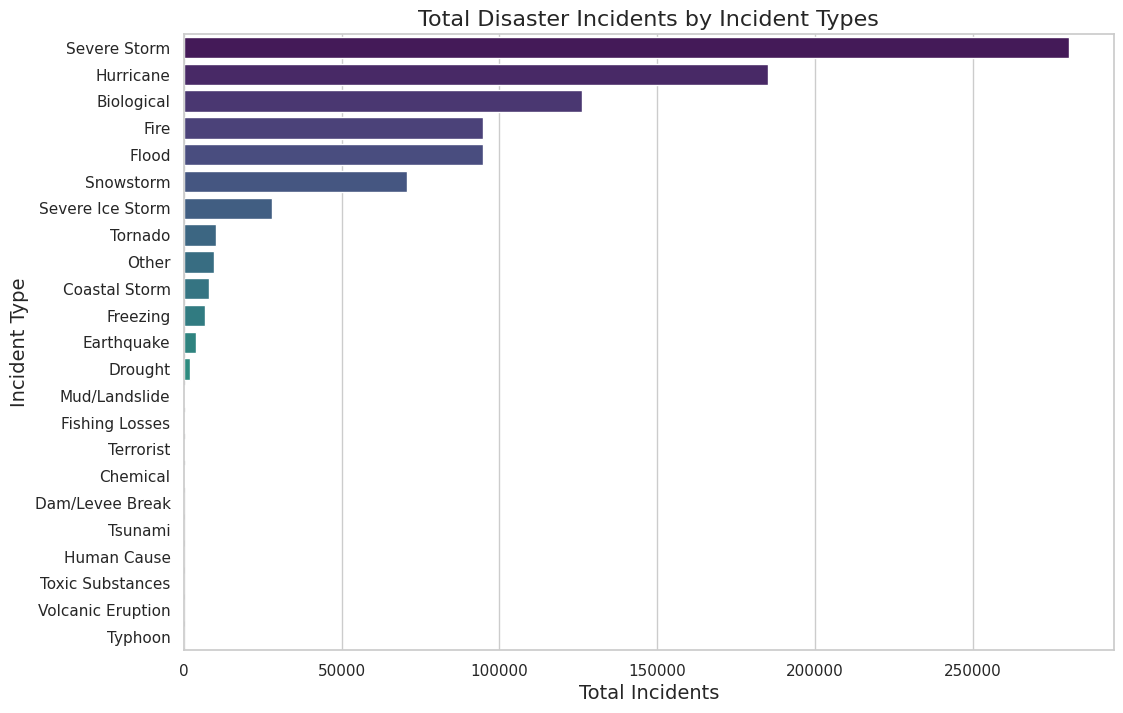

In [152]:
# Visual of Incident Types of Frequency/Number of Incidnets

# Create a Horizontal Bar Plot
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a horizontal bar plot for total incidents by incident type
plt.figure(figsize=(12, 8))
sns.barplot(data=higher_level_summary.sort_values('Total Incidents', ascending=False),
            y='Incident Type',
            x='Total Incidents',
            palette='viridis')

# Add title and labels
plt.title('Total Disaster Incidents by Incident Types', fontsize=16)
plt.xlabel('Total Incidents', fontsize=14)
plt.ylabel('Incident Type', fontsize=14)

# Show the plot
plt.show()

### 4.1.2 Bubble Chart - Total Incidents by Total Years & Incident Types

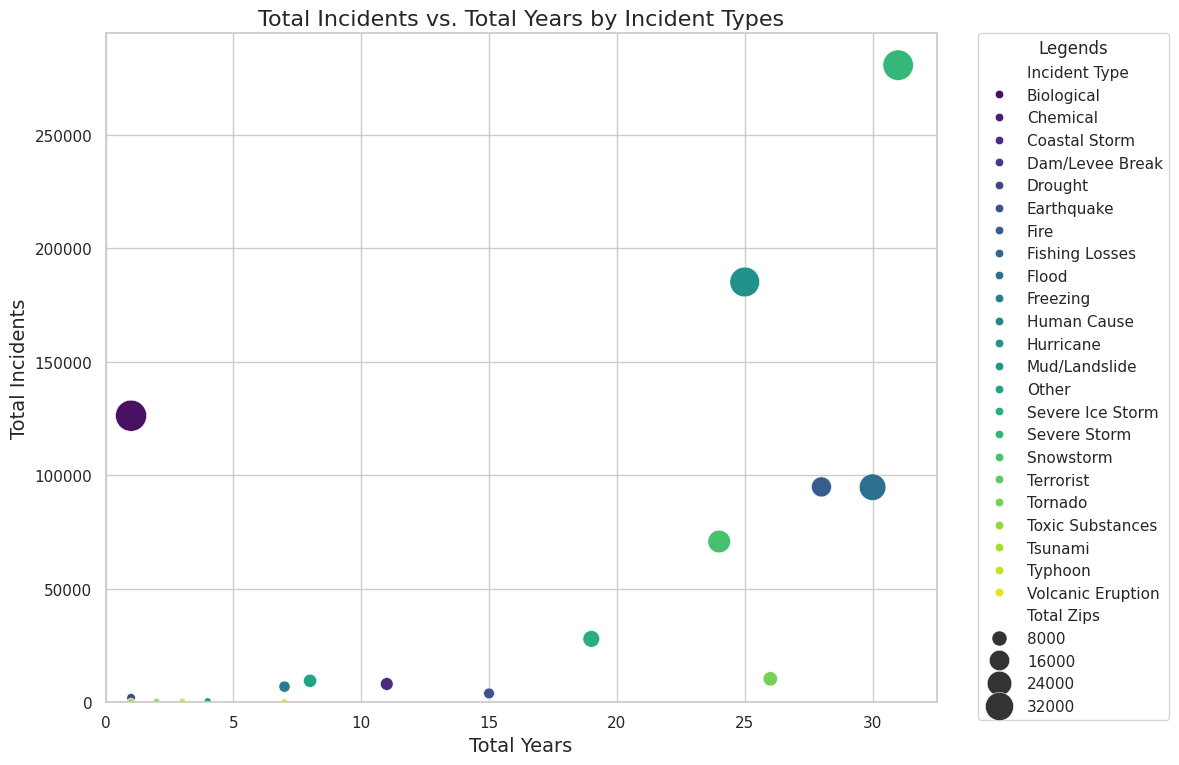

In [153]:
# Bubble Chart

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=higher_level_summary,
                x='Total Years',
                y='Total Incidents',
                size='Total Zips',
                sizes=(20, 500),
                hue='Incident Type',
                palette='viridis')

# Add title and labels
plt.title('Total Incidents vs. Total Years by Incident Types', fontsize=16)
plt.xlabel('Total Years', fontsize=14)
plt.ylabel('Total Incidents', fontsize=14)


# Set axis to start at 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Show the legend
plt.legend(title='Legends', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

### 4.1.3 Heatmap -- Incident Type by Year

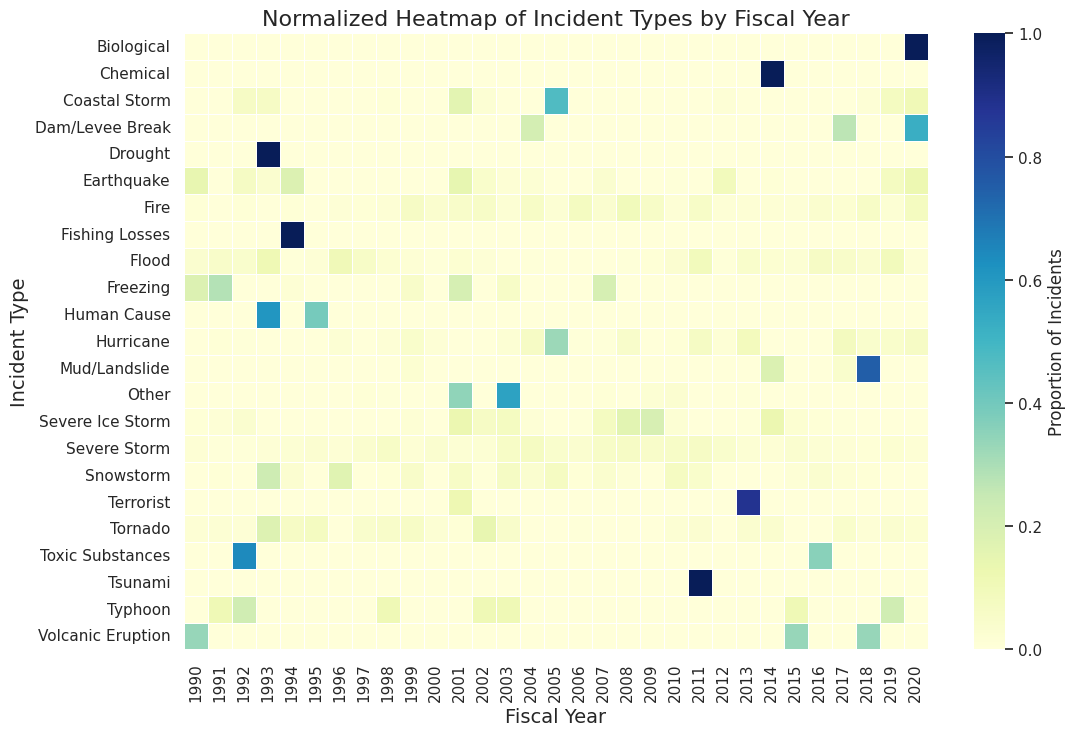

In [154]:
# Heatmap of incident type

import matplotlib.pyplot as plt

# Create a pivot table to summarize the data
heatmap_data = fema_with_zip_MSA_df.pivot_table(
    index='incidentType',
    columns='fyDeclared',
    values='disasterNumber',
    aggfunc='count',
    fill_value=0  # Fill missing values with 0
)

# Normalize the data by dividing by the total number of incidents
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_heatmap_data,
            cmap='YlGnBu',  # Choose a color palette
            annot=False,    # Do not annotate cells
            linewidths=.5,  # Add lines between cells
            cbar_kws={'label': 'Proportion of Incidents'})  # Color bar label

# Add title and labels
plt.title('Normalized Heatmap of Incident Types by Fiscal Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Incident Type', fontsize=14)

# Show the plot
plt.show()

## 4.2. Zip Code Footprint Visual in FEMA Dataframe

In [155]:
#2. Summary of Incidents by Zip Code and Year
zip_year_summary = fema_with_zip_MSA_df.groupby(['zip_code', 'fyDeclared']).size().reset_index(name='incident_count')
print(zip_year_summary)

# Group by zip code and aggregate the required metrics
zip_level_summary = fema_with_zip_MSA_df.groupby('zip_code').agg(
    total_years=('fyDeclared', 'nunique'),  # Count unique years
    total_incident_types=('incidentType', 'nunique'),  # Count unique incident types
    total_incidents=('disasterNumber', 'count')  # Count total incidents
).reset_index()

# Rename the columns for clarity (optional)
zip_level_summary.columns = ['Zip Code', 'Total Years', 'Total Incident Types', 'Total Incidents']

# Display the summary
print(zip_level_summary)

       zip_code  fyDeclared  incident_count
0         00501        1991               1
1         00501        1993               2
2         00501        1996               1
3         00501        1997               1
4         00501        1999               1
...         ...         ...             ...
474574    99925        2020               1
474575    99926        2020               1
474576    99927        2020               1
474577    99928        2020               2
474578    99929        2020               2

[474579 rows x 3 columns]
      Zip Code  Total Years  Total Incident Types  Total Incidents
0        00501           15                     7               24
1        00601           12                     5               40
2        00602            8                     4               29
3        00603            8                     4               26
4        00604            8                     4               13
...        ...          ...                

### 4.2.1 K-means Clustering of Zips in Merged FEMA


In [156]:
# Check Allocation of Zips for 2020 Biological incident types

# Filter for the year 2020 and incident type 'biological'
biological_2020 = fema_with_zip_MSA_df[
    (fema_with_zip_MSA_df['fyDeclared'] == 2020) &
    (fema_with_zip_MSA_df['incidentType'] == 'Biological')
]

# Count the unique zip codes for biological incidents in 2020
unique_biological_zips_2020 = biological_2020['zip_code'].nunique()

# Calculate the total number of unique zip codes in the entire DataFrame
total_unique_zips = fema_with_zip_MSA_df['zip_code'].nunique()

# Calculate the percentage
percentage_biological_zips_2020 = (unique_biological_zips_2020 / total_unique_zips) * 100

# Display the results
print(f"Total unique zip codes with 'biological' incidents in 2020: {unique_biological_zips_2020}")
print(f"Percentage of these zip codes vs total unique zip codes: {percentage_biological_zips_2020:.2f}%")

Total unique zip codes with 'biological' incidents in 2020: 39423
Percentage of these zip codes vs total unique zip codes: 100.00%


In [157]:
# Calculate the average & median total incidents across zip codes
average_total_incidents = zip_level_summary['Total Incidents'].mean()
median_total_incidents = zip_level_summary['Total Incidents'].median()

print("Average Total Incidents across Zip Codes:", average_total_incidents)
print("Median Total Incidents across Zip Codes:", median_total_incidents)


# Calculate the percentils of total incidents across zip codes
percentiles = [0.25, 0.5, 0.75]

# Calculate the percentiles
incident_percentiles = zip_level_summary['Total Incidents'].quantile(percentiles)

# Display the percentiles
print("Percentiles of Total Incidents across Zip Codes:")
print(incident_percentiles)

Average Total Incidents across Zip Codes: 23.421632042208863
Median Total Incidents across Zip Codes: 20.0
Percentiles of Total Incidents across Zip Codes:
0.25    14.0
0.50    20.0
0.75    29.0
Name: Total Incidents, dtype: float64


<ipython-input-158-e2bb1b79ac30>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_incident_zips['Cluster'] = kmeans.fit_predict(X_scaled)


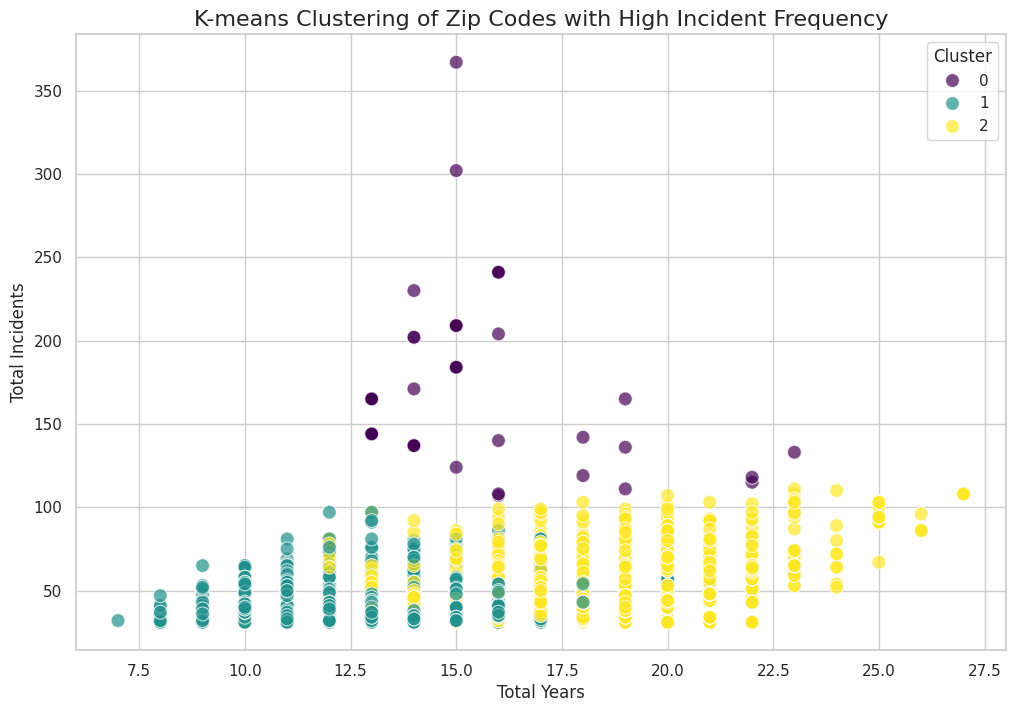

      Zip Code  Total Years  Total Incident Types  Total Incidents  Cluster
1        00601           12                     5               40        1
6        00606           11                     4               40        1
9        00612           13                     5               69        1
15       00623           10                     4               33        1
16       00624           12                     5               53        1
...        ...          ...                   ...              ...      ...
39064    99141           15                     5               32        1
39077    99156           14                     6               33        1
39081    99160           15                     5               32        1
39085    99166           18                     5               43        1
39148    99350           20                     7               53        2

[8229 rows x 5 columns]


In [158]:
# K-means clustering analysis on zip codes with a high frequency of incidents
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Step 1: Filter the data for high frequency of incidents
threshold = 30  # Threshold [75% percentile]
high_incident_zips = zip_level_summary[zip_level_summary['Total Incidents'] > threshold]

# Step 2: Prepare the data for clustering
# Select relevant features for clustering
X = high_incident_zips[['Total Years', 'Total Incident Types', 'Total Incidents']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters= 3, random_state=42)  # Can updatethe number of clusters
high_incident_zips['Cluster'] = kmeans.fit_predict(X_scaled)


# Step 4: Create a mapping of zip codes to cluster labels
zip_cluster_mapping = high_incident_zips[['Zip Code', 'Cluster']]


# Step 5: Merge the cluster labels back to the original DataFrame
fema_with_zip_MSA_df = fema_with_zip_MSA_df.merge(zip_cluster_mapping,
                                                    left_on='zip_code',
                                                    right_on='Zip Code',
                                                    how='left')

# Step 6: Calculate average metrics for each cluster
# cluster_summary = high_incident_zips.groupby('Cluster').agg(
#     avg_total_years=('Total Years', 'mean'),
#     avg_total_incident_types=('Total Incident Types', 'mean'),
#     avg_total_incidents=('Total Incidents', 'mean')
# ).reset_index()

# Step 7: Assign severity labels based on average total incidents
# def assign_severity(row):
#     if row['avg_total_incidents'] < 50:
#         return 'Low'
#     elif 50 <= row['avg_total_incidents'] < 100:
#         return 'Medium'
#     else:
#         return 'High'

# cluster_summary['Severity'] = cluster_summary.apply(assign_severity, axis=1)

# Step 8: Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=high_incident_zips,
                x='Total Years',
                y='Total Incidents',
                hue='Cluster',
                palette='viridis',
                s=100,
                alpha=0.7)

# Add title and labels
plt.title('K-means Clustering of Zip Codes with High Incident Frequency', fontsize=16)
plt.xlabel('Total Years', fontsize=12)
plt.ylabel('Total Incidents', fontsize=12)
plt.legend(title='Cluster')
plt.show()

# Display the clustered data
print(high_incident_zips[['Zip Code', 'Total Years', 'Total Incident Types', 'Total Incidents', 'Cluster']])

# Rename the severity column for clarity
fema_with_zip_MSA_df.rename(columns={'Severity': 'Incident Severity'}, inplace=True)



## 4.3. Total Disaster Incidents by Year Visual


In [159]:
#3. Total Disaster Incidents by Year
total_incidents_by_year = fema_with_zip_MSA_df.groupby('fyDeclared').size().reset_index(name='total_incidents')
print(total_incidents_by_year)

# Group by year and compute summary
yearly_summary = fema_with_zip_MSA_df.groupby('fyDeclared').agg(
    total_unique_zips=('zip_code', 'nunique'),
    total_incident_types=('incidentType', 'nunique'),
    total_incidents=('disasterNumber', 'count')
).reset_index()

# Display the summary
print(yearly_summary)

    fyDeclared  total_incidents
0         1990            11375
1         1991            10848
2         1992             8904
3         1993            35063
4         1994            11906
5         1995            10784
6         1996            32286
7         1997            16972
8         1998            25155
9         1999            26332
10        2000            15880
11        2001            28558
12        2002            16795
13        2003            36061
14        2004            41799
15        2005            82518
16        2006            18819
17        2007            27301
18        2008            42270
19        2009            26855
20        2010            28110
21        2011            48508
22        2012            16530
23        2013            29103
24        2014            13207
25        2015            13860
26        2016            18780
27        2017            28425
28        2018            20364
29        2019            26644
30      

### 4.3.1 Bar + Line Chart Visual for Annual Incident Summary

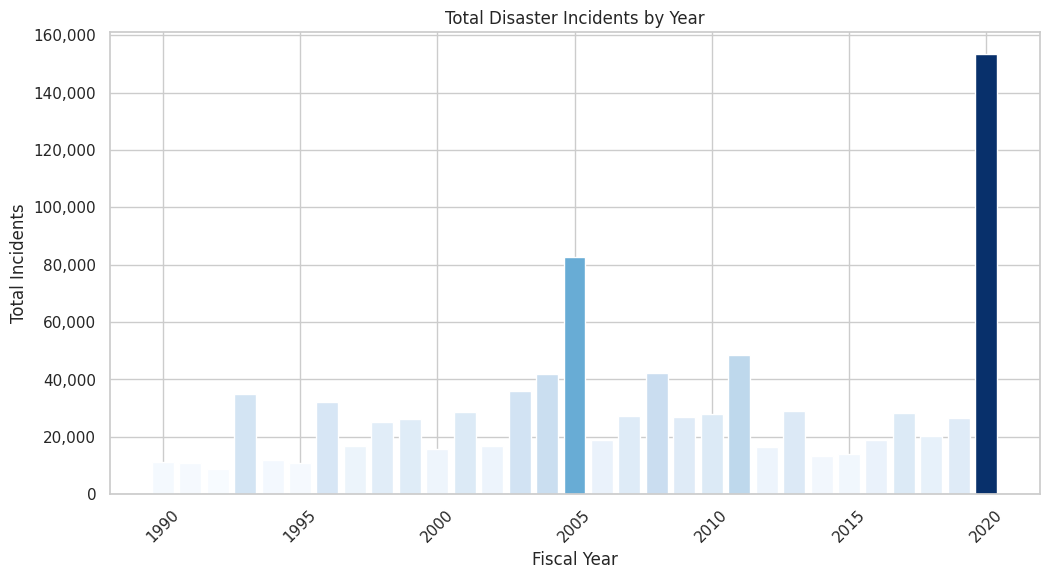

In [160]:

from matplotlib.ticker import FuncFormatter


# Normalize the total incidents for color mapping
total_incidents_by_year['normalized'] = (total_incidents_by_year['total_incidents'] - total_incidents_by_year['total_incidents'].min()) / (total_incidents_by_year['total_incidents'].max() - total_incidents_by_year['total_incidents'].min())

# Create a colormap
cmap = plt.get_cmap('Blues')  # You can choose any single color scheme

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(total_incidents_by_year['fyDeclared'], total_incidents_by_year['total_incidents'],
                color=cmap(total_incidents_by_year['normalized']))

# Add title and labels
plt.title('Total Disaster Incidents by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Incidents')

# Format the y-axis to show numbers with commas
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format the number with commas

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.xticks(rotation=45)

# Show the plot
plt.show()

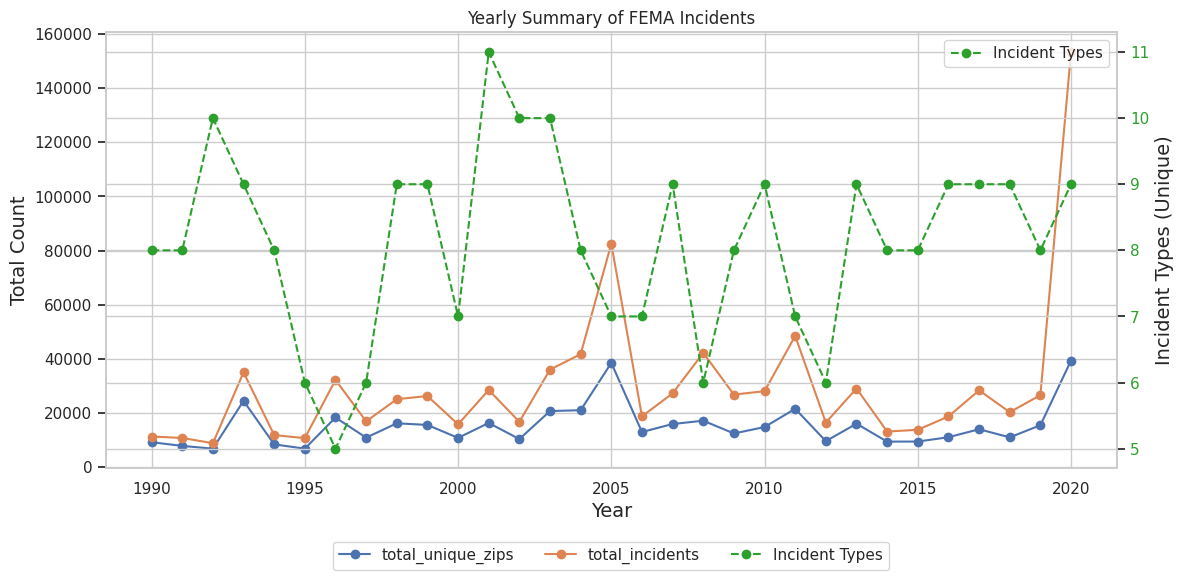

In [161]:

# Create the plot with a primary and secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot line charts on primary y-axis
yearly_summary.set_index('fyDeclared')[['total_unique_zips', 'total_incidents']].plot(
    kind='line', ax=ax1, marker='o'
)

# Customize primary y-axis
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Total Count', fontsize=14)
ax1.set_title('Yearly Summary of FEMA Incidents')
ax1.legend(title='Metrics', loc='upper left')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot line chart for incident types on secondary y-axis
yearly_summary.plot(
    kind='line', x='fyDeclared', y='total_incident_types', ax=ax2,
    label='Incident Types', color='tab:green', linestyle='--', marker='o'
)

# Customize secondary y-axis
ax2.set_ylabel('Incident Types (Unique)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:green')

# Create a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Final layout
plt.tight_layout()
plt.show()

In [162]:
# #4. Incidents by State and Incident Type

# state_incident_summary = fema_with_zip_MSA_df.groupby(['state', 'incidentType']).size().reset_index(name='incident_count')
# print(state_incident_summary)


# state_level_summary = fema_with_zip_MSA_df.groupby('state').agg(
#     total_incident_types=('incidentType', 'nunique'),  # Count unique incident types
#     total_years=('fyDeclared', 'nunique'),  # Count unique years
#     total_incidents=('disasterNumber', 'count')  # Count total incidents
# ).reset_index()

# # Display the summary
# print(state_level_summary)

# 5. EDA for HPI Dataframe

## 5.1 Time Trend Analysis of HPI: Average HPI Trend by MSA and State

We visualized the **average Housing Price Index (HPI)** over time by aggregating data at two levels:

- **MSA-Level**: Aggregated HPI trends across different Metropolitan Statistical Areas. This shows how urban regions may follow different housing price trajectories.
- **State-Level**: Displays regional differences in housing prices across U.S. states, highlighting geographic price gaps or macroeconomic effects.


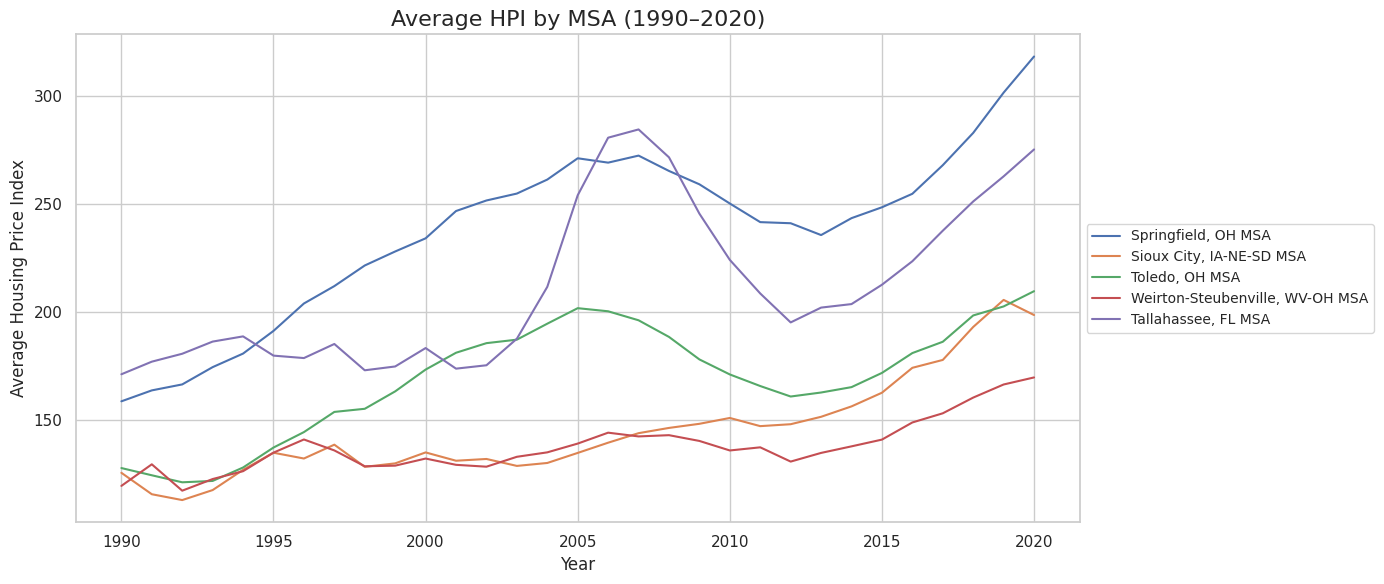

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

df = clean_hpi_geo_df.copy()

hpi_cols = [col for col in df.columns if col.startswith("HPI_")]

years = [int(col.split("_")[1]) for col in hpi_cols]

## MSA-level Aggregation

msa_grouped = df.groupby("msa_name")[hpi_cols].mean()

msa_sample = msa_grouped.sample(5, random_state=42)
plt.figure(figsize=(14, 6))
for msa in msa_sample.index:
    plt.plot(years, msa_sample.loc[msa].values, label=msa)

plt.title("Average HPI by MSA (1990–2020)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Housing Price Index")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()


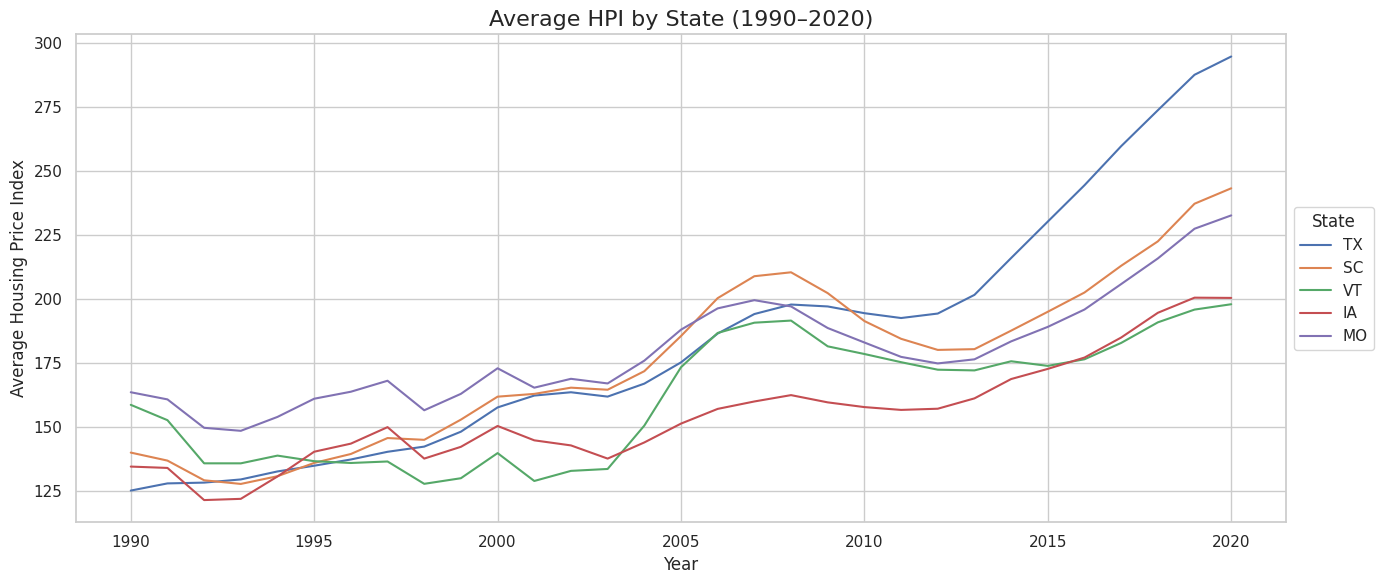

In [164]:
## State-level Aggregation
state_grouped = df.groupby("state")[hpi_cols].mean()

state_sample = state_grouped.sample(5, random_state=42)
plt.figure(figsize=(14, 6))
for state in state_sample.index:
    plt.plot(years, state_sample.loc[state].values, label=state)

plt.title("Average HPI by State (1990–2020)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Housing Price Index")
plt.legend(title="State", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## 5.2 Time Trend Analysis of HPI: Volatility in Housing Price Growth (1990–2020)

To explore fluctuations in housing price growth, we calculated the **standard deviation** of annual percentage change (`annual_change`) across all ZIP codes for each year.

This helps us assess whether certain years—such as the 2008 financial crisis—exhibited more volatility in housing prices. Years with larger standard deviations reflect greater inconsistency and turbulence in the housing market.


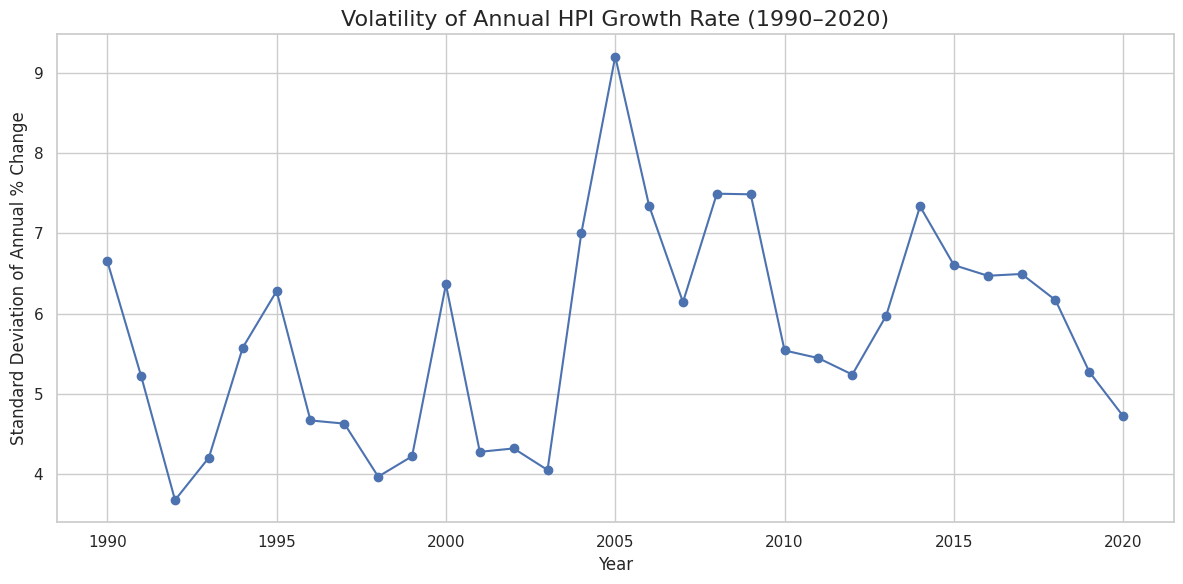

In [165]:
import matplotlib.pyplot as plt

change_cols = [col for col in clean_hpi_geo_df.columns if col.startswith("annual_change_")]
years = [int(col.split("_")[2]) for col in change_cols]

std_by_year = clean_hpi_geo_df[change_cols].std()

plt.figure(figsize=(12, 6))
plt.plot(years, std_by_year, marker='o', linestyle='-')
plt.title("Volatility of Annual HPI Growth Rate (1990–2020)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Annual % Change")
plt.grid(True)
plt.tight_layout()
plt.show()


# **MODELING**

# 6. Merging HPI with Demographic and FEMA dataframe

## 6.1 Review of All Cleaned Dataframes for Overall Merging

In [167]:
county_demographics_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623972 entries, 0 to 1623971
Data columns (total 23 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   year                               1623972 non-null  int64  
 1   fips                               1623972 non-null  int64  
 2   caucasion_population_ratio         1623972 non-null  float64
 3   African-American_population_ratio  1623972 non-null  float64
 4   other_race_population_ratio        1623972 non-null  float64
 5   non-Hispanic_population_ratio      1623972 non-null  float64
 6   hispanic_population_ratio          1623972 non-null  float64
 7   male_population_ratio              1623972 non-null  float64
 8   female_population_ratio            1623972 non-null  float64
 9   age_0_to_19_population_ratio       1623972 non-null  float64
 10  age_20_to_39_population_ratio      1623972 non-null  float64
 11  age_40_to_59_population_

In [168]:
fema_with_zip_MSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923351 entries, 0 to 923350
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   disasterNumber   923351 non-null  int64              
 1   designatedArea   923351 non-null  object             
 2   declarationDate  923351 non-null  datetime64[ns, UTC]
 3   fyDeclared       923351 non-null  int64              
 4   incidentType     923351 non-null  object             
 5   fipsStateCode    923351 non-null  int64              
 6   fipsCountyCode   923351 non-null  int64              
 7   fips             923351 non-null  object             
 8   zip_code         923351 non-null  object             
 9   zip_no           923351 non-null  int64              
 10  msa_name         923351 non-null  object             
 11  county_no        923351 non-null  int64              
 12  zip              923351 non-null  object             
 13 

In [206]:
cleaned_hpi_df.info()

print(cleaned_hpi_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 507056 entries, 0 to 512395
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   zip_code       507056 non-null  object 
 1   Year           507056 non-null  int64  
 2   annual_change  493590 non-null  float64
 3   HPI            507056 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.3+ MB
  zip_code  Year  annual_change     HPI
0    01001  1990          -1.51  191.16
1    01001  1991          -5.50  180.65
2    01001  1992          -1.56  177.84
3    01001  1993           0.56  178.84
4    01001  1994          -3.05  173.39


In [207]:
# clean_hpi_geo_df.info()
# print(clean_hpi_geo_df.head())

In [170]:
# Deduplicate zip_fips mapping
zip_fips_df_dedup = zip_fips_df.sort_values(by=["zip", "fips_string"]).drop_duplicates(subset=["zip"], keep="first")
zip_fips_df_dedup["zip_code"] = zip_fips_df_dedup["zip"].apply(lambda x: f"{int(x):05}")
zip_fips_df_dedup = zip_fips_df_dedup.drop(columns=["zip"])  # drop redundant

# Merge HPI with geographic info
hpi_with_geo = pd.merge(cleaned_hpi_df, zip_fips_df_dedup, on="zip_code", how="left")

# Prepare FEMA disaster summary
fema_with_zip_MSA_df["Year"] = fema_with_zip_MSA_df["declarationDate"].dt.year
fema_summary = fema_with_zip_MSA_df.groupby(["zip_code", "Year"]).agg(
    disaster_count=("disasterNumber", "count"),
    incident_types=("incidentType", lambda x: ",".join(sorted(x.unique()))),
    clusters=("Cluster", lambda x: ",".join(map(str, sorted(x.unique()))))
).reset_index()

# Standardize demographics column name
if "year" in county_demographics_merged_df.columns:
    county_demographics_merged_df = county_demographics_merged_df.rename(columns={"year": "Year"})

# Merge HPI+geo with FEMA
merged_hpi_fema = pd.merge(hpi_with_geo, fema_summary, on=["zip_code", "Year"], how="left")

# Merge with demographics
merged_all = pd.merge(merged_hpi_fema, county_demographics_merged_df, on=["zip_code", "Year"], how="left")

# drop duplicates if any
merged_all = merged_all.drop_duplicates(subset=["zip_code", "Year"])

merged_all.head()


,zip_code,Year,annual_change,HPI,county_name_x,state_x,stcountyfp_x,fips_string_x,disaster_count,incident_types,...,age_60_to_79_population_ratio,age_80_and_over_population_ratio,zip_no,msa_name,county_no,zip,county_name_y,state_y,stcountyfp_y,fips_string_y
0,01001,1990,-1.51,191.16,Hampden County,MA,25013.0,25013,NaN,NaN,...,0.15872,0.03454,1001.0,"Springfield, MA MSA",13.0,01001,Hampden County,MA,25013.0,25013
1,01001,1991,-5.50,180.65,Hampden County,MA,25013.0,25013,1.0,Hurricane,...,0.15777,0.03564,1001.0,"Springfield, MA MSA",13.0,01001,Hampden County,MA,25013.0,25013
2,01001,1992,-1.56,177.84,Hampden County,MA,25013.0,25013,NaN,NaN,...,0.15644,0.03661,1001.0,"Springfield, MA MSA",13.0,01001,Hampden County,MA,25013.0,25013
3,01001,1993,0.56,178.84,Hampden County,MA,25013.0,25013,1.0,Snowstorm,...,0.15398,0.03746,1001.0,"Springfield, MA MSA",13.0,01001,Hampden County,MA,25013.0,25013
4,01001,1994,-3.05,173.39,Hampden County,MA,25013.0,25013,NaN,NaN,...,0.15166,0.03836,1001.0,"Springfield, MA MSA",13.0,01001,Hampden County,MA,25013.0,25013


In [171]:
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507056 entries, 0 to 728400
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   zip_code                           507056 non-null  object 
 1   Year                               507056 non-null  int64  
 2   annual_change                      493590 non-null  float64
 3   HPI                                507056 non-null  float64
 4   county_name_x                      506844 non-null  object 
 5   state_x                            506844 non-null  object 
 6   stcountyfp_x                       506844 non-null  float64
 7   fips_string_x                      506844 non-null  object 
 8   disaster_count                     206760 non-null  float64
 9   incident_types                     206760 non-null  object 
 10  clusters                           206760 non-null  object 
 11  fips                               505526 no

In [172]:
# Drop redundant columns
fema_hpi_demo_df = merged_all.drop(columns=[
    "county_name_y", "state_y", "stcountyfp_y", "fips_string_y",
    "zip_no", "zip", "county_no", "stcountyfp_x", "fips_string_x"
])

# Rename columns
fema_hpi_demo_df = fema_hpi_demo_df.rename(columns={
    "county_name_x": "county_name",
    "state_x": "state",
})

# Check result
fema_hpi_demo_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 507056 entries, 0 to 728400
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   zip_code                           507056 non-null  object 
 1   Year                               507056 non-null  int64  
 2   annual_change                      493590 non-null  float64
 3   HPI                                507056 non-null  float64
 4   county_name                        506844 non-null  object 
 5   state                              506844 non-null  object 
 6   disaster_count                     206760 non-null  float64
 7   incident_types                     206760 non-null  object 
 8   clusters                           206760 non-null  object 
 9   fips                               505526 non-null  float64
 10  caucasion_population_ratio         505526 non-null  float64
 11  African-American_population_ratio  505526 no

In [173]:

print("Final merged DataFrame shape:", fema_hpi_demo_df.shape)
fema_hpi_demo_df.head(100)

Final merged DataFrame shape: (507056, 23)


,zip_code,Year,annual_change,HPI,county_name,state,disaster_count,incident_types,clusters,fips,...,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio,msa_name
0,01001,1990,-1.51,191.16,Hampden County,MA,NaN,NaN,NaN,25013.0,...,0.89901,0.10099,0.47560,0.52440,0.28107,0.32055,0.20511,0.15872,0.03454,"Springfield, MA MSA"
1,01001,1991,-5.50,180.65,Hampden County,MA,1.0,Hurricane,nan,25013.0,...,0.89430,0.10570,0.47588,0.52412,0.28056,0.31835,0.20767,0.15777,0.03564,"Springfield, MA MSA"
2,01001,1992,-1.56,177.84,Hampden County,MA,NaN,NaN,NaN,25013.0,...,0.88970,0.11030,0.47639,0.52361,0.28028,0.31472,0.21195,0.15644,0.03661,"Springfield, MA MSA"
3,01001,1993,0.56,178.84,Hampden County,MA,1.0,Snowstorm,nan,25013.0,...,0.88495,0.11505,0.47659,0.52341,0.28308,0.30872,0.21677,0.15398,0.03746,"Springfield, MA MSA"
4,01001,1994,-3.05,173.39,Hampden County,MA,NaN,NaN,NaN,25013.0,...,0.88068,0.11932,0.47696,0.52304,0.28504,0.30250,0.22244,0.15166,0.03836,"Springfield, MA MSA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,01007,1994,-1.07,151.84,Hampshire County,MA,NaN,NaN,NaN,25015.0,...,0.97074,0.02926,0.47038,0.52962,0.26955,0.35825,0.21849,0.12347,0.03023,"Springfield, MA MSA"
127,01007,1995,0.60,152.76,Hampshire County,MA,NaN,NaN,NaN,25015.0,...,0.96988,0.03012,0.46956,0.53044,0.27069,0.35006,0.22572,0.12218,0.03135,"Springfield, MA MSA"
128,01007,1996,1.46,154.99,Hampshire County,MA,1.0,Snowstorm,nan,25015.0,...,0.96929,0.03071,0.46843,0.53157,0.27096,0.34195,0.23452,0.12029,0.03226,"Springfield, MA MSA"
129,01007,1997,1.09,156.68,Hampshire County,MA,NaN,NaN,NaN,25015.0,...,0.96850,0.03150,0.46792,0.53208,0.26971,0.33409,0.24412,0.11880,0.03329,"Springfield, MA MSA"


In [174]:
# Check for null values in each column
null_counts = fema_hpi_demo_df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

zip_code                                  0
Year                                      0
annual_change                         13466
HPI                                       0
county_name                             212
state                                   212
disaster_count                       300296
incident_types                       300296
clusters                             300296
fips                                   1530
caucasion_population_ratio             1530
African-American_population_ratio      1530
other_race_population_ratio            1530
non-Hispanic_population_ratio          1530
hispanic_population_ratio              1530
male_population_ratio                  1530
female_population_ratio                1530
age_0_to_19_population_ratio           1530
age_20_to_39_population_ratio          1530
age_40_to_59_population_ratio          1530
age_60_to_79_population_ratio          1530
age_80_and_over_population_ratio       1530
msa_name                        

In [175]:
# Drop rows with Null Values: Incident Types, HPI, Demographic (e.g., )

# Drop rows where 'incidentType' is null & reset the index
fema_hpi_demo_df = fema_hpi_demo_df.dropna(subset=['incident_types']).reset_index(drop=True)
fema_hpi_demo_df = fema_hpi_demo_df.dropna(subset=['HPI']).reset_index(drop=True)
fema_hpi_demo_df = fema_hpi_demo_df.dropna(subset=['caucasion_population_ratio']).reset_index(drop=True)


# Display the updated DataFrame
print(fema_hpi_demo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206544 entries, 0 to 206543
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   zip_code                           206544 non-null  object 
 1   Year                               206544 non-null  int64  
 2   annual_change                      201486 non-null  float64
 3   HPI                                206544 non-null  float64
 4   county_name                        206544 non-null  object 
 5   state                              206544 non-null  object 
 6   disaster_count                     206544 non-null  float64
 7   incident_types                     206544 non-null  object 
 8   clusters                           206544 non-null  object 
 9   fips                               206544 non-null  float64
 10  caucasion_population_ratio         206544 non-null  float64
 11  African-American_population_ratio  2065

In [176]:
# Check for null values in each column
null_counts = fema_hpi_demo_df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

zip_code                                0
Year                                    0
annual_change                        5058
HPI                                     0
county_name                             0
state                                   0
disaster_count                          0
incident_types                          0
clusters                                0
fips                                    0
caucasion_population_ratio              0
African-American_population_ratio       0
other_race_population_ratio             0
non-Hispanic_population_ratio           0
hispanic_population_ratio               0
male_population_ratio                   0
female_population_ratio                 0
age_0_to_19_population_ratio            0
age_20_to_39_population_ratio           0
age_40_to_59_population_ratio           0
age_60_to_79_population_ratio           0
age_80_and_over_population_ratio        0
msa_name                                0
dtype: int64


In [177]:
fema_hpi_demo_df.head(25)

,zip_code,Year,annual_change,HPI,county_name,state,disaster_count,incident_types,clusters,fips,...,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio,msa_name
0,01001,1991,-5.50,180.65,Hampden County,MA,1.0,Hurricane,nan,25013.0,...,0.89430,0.10570,0.47588,0.52412,0.28056,0.31835,0.20767,0.15777,0.03564,"Springfield, MA MSA"
1,01001,1993,0.56,178.84,Hampden County,MA,1.0,Snowstorm,nan,25013.0,...,0.88495,0.11505,0.47659,0.52341,0.28308,0.30872,0.21677,0.15398,0.03746,"Springfield, MA MSA"
2,01001,1996,0.12,176.91,Hampden County,MA,1.0,Snowstorm,nan,25013.0,...,0.87070,0.12930,0.47750,0.52250,0.28746,0.28958,0.23503,0.14773,0.04019,"Springfield, MA MSA"
3,01001,2003,8.49,241.94,Hampden County,MA,1.0,Snowstorm,nan,25013.0,...,0.83261,0.16739,0.47923,0.52077,0.28502,0.25655,0.27624,0.13732,0.04487,"Springfield, MA MSA"
4,01001,2004,12.14,271.31,Hampden County,MA,1.0,Snowstorm,nan,25013.0,...,0.82775,0.17225,0.47957,0.52043,0.28278,0.25375,0.28030,0.13746,0.04571,"Springfield, MA MSA"
5,01001,2005,17.25,318.11,Hampden County,MA,3.0,"Hurricane,Severe Storm,Snowstorm",nan,25013.0,...,0.82316,0.17684,0.47999,0.52001,0.28023,0.25175,0.28397,0.13731,0.04675,"Springfield, MA MSA"
6,01001,2007,-0.28,327.77,Hampden County,MA,1.0,Severe Storm,nan,25013.0,...,0.81058,0.18942,0.48026,0.51974,0.27659,0.24868,0.28552,0.14120,0.04802,"Springfield, MA MSA"
7,01001,2008,-0.51,326.11,Hampden County,MA,1.0,Severe Storm,nan,25013.0,...,0.80359,0.19641,0.48049,0.51951,0.27491,0.24746,0.28472,0.14470,0.04822,"Springfield, MA MSA"
8,01001,2009,-3.97,313.18,Hampden County,MA,1.0,Severe Ice Storm,nan,25013.0,...,0.79644,0.20356,0.48062,0.51938,0.27269,0.24756,0.28392,0.14796,0.04789,"Springfield, MA MSA"
9,01001,2011,-2.63,299.03,Hampden County,MA,5.0,"Hurricane,Severe Storm,Snowstorm,Tornado",nan,25013.0,...,0.78403,0.21597,0.48123,0.51877,0.26707,0.24990,0.28124,0.15454,0.04725,"Springfield, MA MSA"


## 6.2 One-Hot Encoding for FEMA Incident Types

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the claned fema dataframe
filtered_df = fema_hpi_demo_df.copy()


# Split disaster types into list
filtered_df['incident_types_list'] = filtered_df['incident_types'].str.split(',')

# Explode the list to create a row for each incident type
exploded_df = filtered_df.explode('incident_types_list')

# Perform one-hot encoding on the exploded column
one_hot_df = pd.get_dummies(exploded_df, columns=['incident_types_list'], prefix='disaster')

# Group by zip_code & Year, aggregate the one-hot encoded columns
aggregated_one_hot_df = one_hot_df.groupby(['zip_code', 'Year'], as_index=False).agg({
    **{col: 'sum' for col in one_hot_df.columns if col.startswith('disaster_')}
})

## UPDATED CODES ##
# Merge the aggregated one-hot encoded columns back with the original DataFrame
encoded_fema_annual_change_df = pd.merge(
    filtered_df.drop(columns=['incident_types_list']),  # Drop the temporary list column
    aggregated_one_hot_df,
    on=['zip_code', 'Year'],
    how='left'
)

# Display the updated DataFrame
print(encoded_fema_annual_change_df.head())


# # Print preview
# print("Encoded FEMA + HPI demo DataFrame:")
# print(encoded_fema_annual_change_df.head())
# print(f"Shape: {encoded_fema_annual_change_df.shape}")

  zip_code  Year  annual_change     HPI     county_name state  \
0    01001  1991          -5.50  180.65  Hampden County    MA   
1    01001  1993           0.56  178.84  Hampden County    MA   
2    01001  1996           0.12  176.91  Hampden County    MA   
3    01001  2003           8.49  241.94  Hampden County    MA   
4    01001  2004          12.14  271.31  Hampden County    MA   

   disaster_count_x incident_types clusters     fips  ...  \
0               1.0      Hurricane      nan  25013.0  ...   
1               1.0      Snowstorm      nan  25013.0  ...   
2               1.0      Snowstorm      nan  25013.0  ...   
3               1.0      Snowstorm      nan  25013.0  ...   
4               1.0      Snowstorm      nan  25013.0  ...   

   disaster_Mud/Landslide  disaster_Other  disaster_Severe Ice Storm  \
0                       0               0                          0   
1                       0               0                          0   
2                       0 

In [179]:
encoded_fema_annual_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206544 entries, 0 to 206543
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   zip_code                           206544 non-null  object 
 1   Year                               206544 non-null  int64  
 2   annual_change                      201486 non-null  float64
 3   HPI                                206544 non-null  float64
 4   county_name                        206544 non-null  object 
 5   state                              206544 non-null  object 
 6   disaster_count_x                   206544 non-null  float64
 7   incident_types                     206544 non-null  object 
 8   clusters                           206544 non-null  object 
 9   fips                               206544 non-null  float64
 10  caucasion_population_ratio         206544 non-null  float64
 11  African-American_population_ratio  2065

In [181]:
full_encoded_df = encoded_fema_annual_change_df.copy()

full_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206544 entries, 0 to 206543
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   zip_code                           206544 non-null  object 
 1   Year                               206544 non-null  int64  
 2   annual_change                      201486 non-null  float64
 3   HPI                                206544 non-null  float64
 4   county_name                        206544 non-null  object 
 5   state                              206544 non-null  object 
 6   disaster_count_x                   206544 non-null  float64
 7   incident_types                     206544 non-null  object 
 8   clusters                           206544 non-null  object 
 9   fips                               206544 non-null  float64
 10  caucasion_population_ratio         206544 non-null  float64
 11  African-American_population_ratio  2065

In [182]:
columns_to_drop = [
    'disaster_count_y', 'incident_types'
]
full_encoded_df = full_encoded_df.drop(columns=columns_to_drop)

full_encoded_df = full_encoded_df.rename(columns={'disaster_count_x': 'disaster_count'})
full_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206544 entries, 0 to 206543
Data columns (total 44 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   zip_code                           206544 non-null  object 
 1   Year                               206544 non-null  int64  
 2   annual_change                      201486 non-null  float64
 3   HPI                                206544 non-null  float64
 4   county_name                        206544 non-null  object 
 5   state                              206544 non-null  object 
 6   disaster_count                     206544 non-null  float64
 7   clusters                           206544 non-null  object 
 8   fips                               206544 non-null  float64
 9   caucasion_population_ratio         206544 non-null  float64
 10  African-American_population_ratio  206544 non-null  float64
 11  other_race_population_ratio        2065

In [183]:
# Re-arrange data by zip and then by year

# Sort the DataFrame by 'zip_code' and then by 'Year'
full_encoded_df = full_encoded_df.sort_values(by=['zip_code', 'Year'])

# Reset the index to reflect the new order
full_encoded_df = full_encoded_df.reset_index(drop=True)



In [184]:
full_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206544 entries, 0 to 206543
Data columns (total 44 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   zip_code                           206544 non-null  object 
 1   Year                               206544 non-null  int64  
 2   annual_change                      201486 non-null  float64
 3   HPI                                206544 non-null  float64
 4   county_name                        206544 non-null  object 
 5   state                              206544 non-null  object 
 6   disaster_count                     206544 non-null  float64
 7   clusters                           206544 non-null  object 
 8   fips                               206544 non-null  float64
 9   caucasion_population_ratio         206544 non-null  float64
 10  African-American_population_ratio  206544 non-null  float64
 11  other_race_population_ratio        2065

In [185]:
print(full_encoded_df.head(5))

  zip_code  Year  annual_change     HPI     county_name state  disaster_count  \
0    01001  1991          -5.50  180.65  Hampden County    MA             1.0   
1    01001  1993           0.56  178.84  Hampden County    MA             1.0   
2    01001  1996           0.12  176.91  Hampden County    MA             1.0   
3    01001  2003           8.49  241.94  Hampden County    MA             1.0   
4    01001  2004          12.14  271.31  Hampden County    MA             1.0   

  clusters     fips  caucasion_population_ratio  ...  disaster_Mud/Landslide  \
0      nan  25013.0                     0.90386  ...                       0   
1      nan  25013.0                     0.89773  ...                       0   
2      nan  25013.0                     0.89290  ...                       0   
3      nan  25013.0                     0.87391  ...                       0   
4      nan  25013.0                     0.87086  ...                       0   

   disaster_Other  disaster_Seve

## 6.3 EDA - Correlations

###  6.3.1 Correlation of Demographics, Disaster Frequency, and Housing Price Index

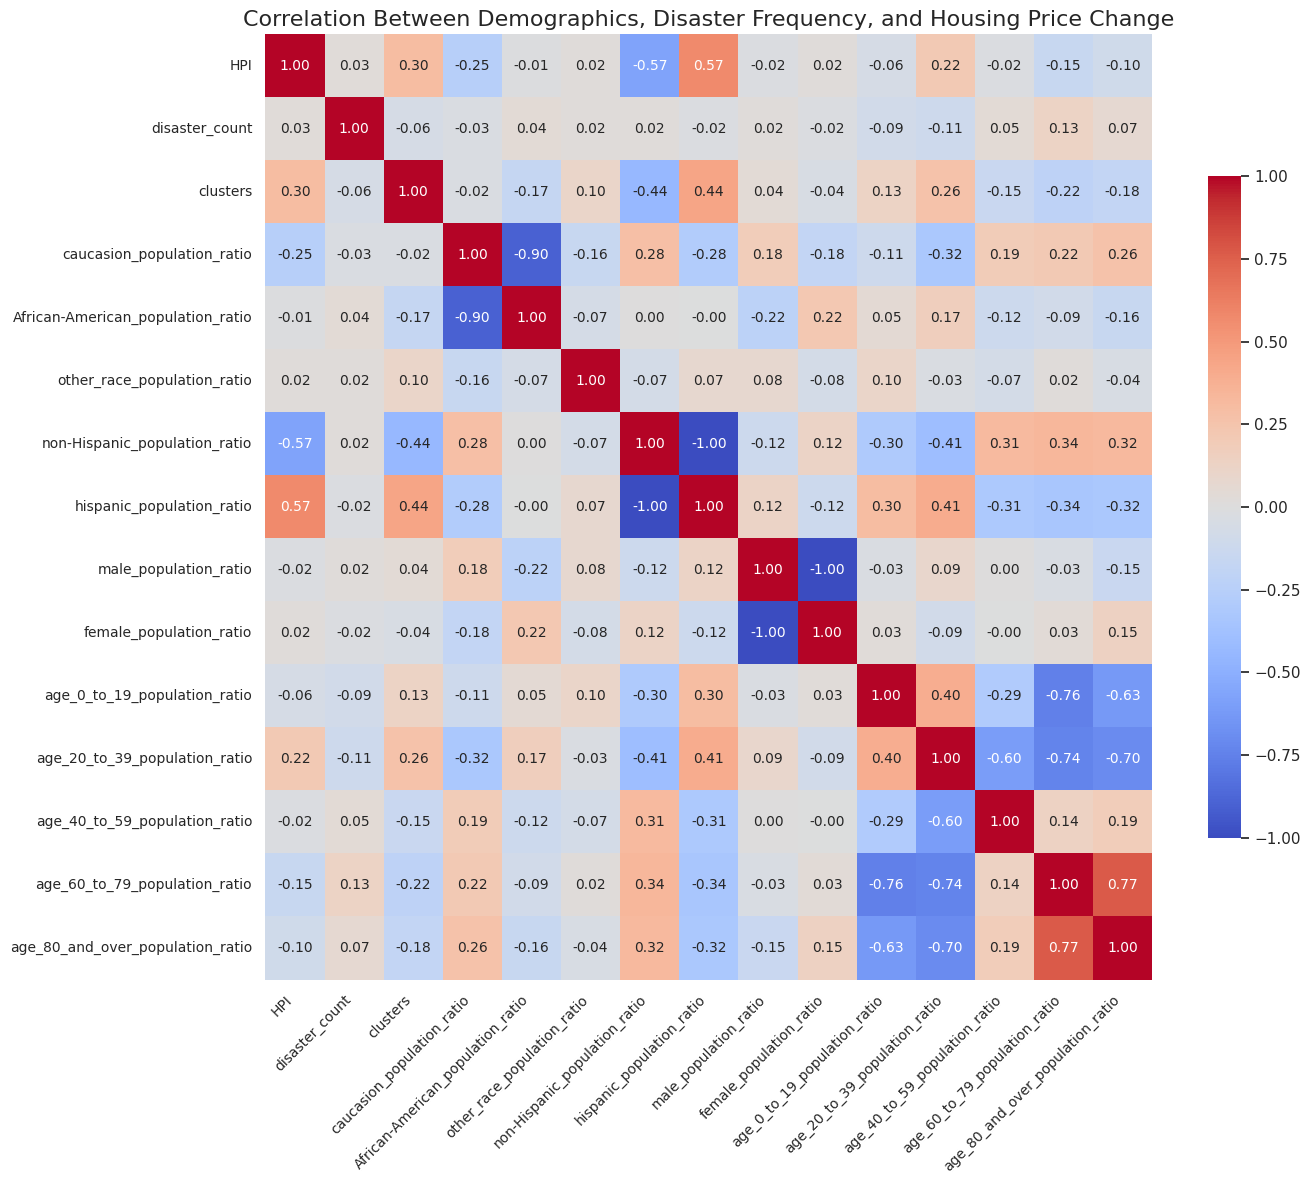

In [186]:
# Modeling

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select relevant columns for correlation analysis

full_encoded_df['clusters'] = pd.to_numeric(full_encoded_df['clusters'], errors='coerce')

correlation_columns = [
    'HPI', 'disaster_count', 'clusters',
    'caucasion_population_ratio', 'African-American_population_ratio',
    'other_race_population_ratio', 'non-Hispanic_population_ratio',
    'hispanic_population_ratio', 'male_population_ratio',
    'female_population_ratio', 'age_0_to_19_population_ratio',
    'age_20_to_39_population_ratio', 'age_40_to_59_population_ratio',
    'age_60_to_79_population_ratio', 'age_80_and_over_population_ratio'
]


# Step 2: Drop rows with missing values
correlation_data = full_encoded_df[correlation_columns].dropna()

# Step 3: Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Between Demographics, Disaster Frequency, and Housing Price Change", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### 6.3.2 Correlations of Incident Types and Housing Price Index

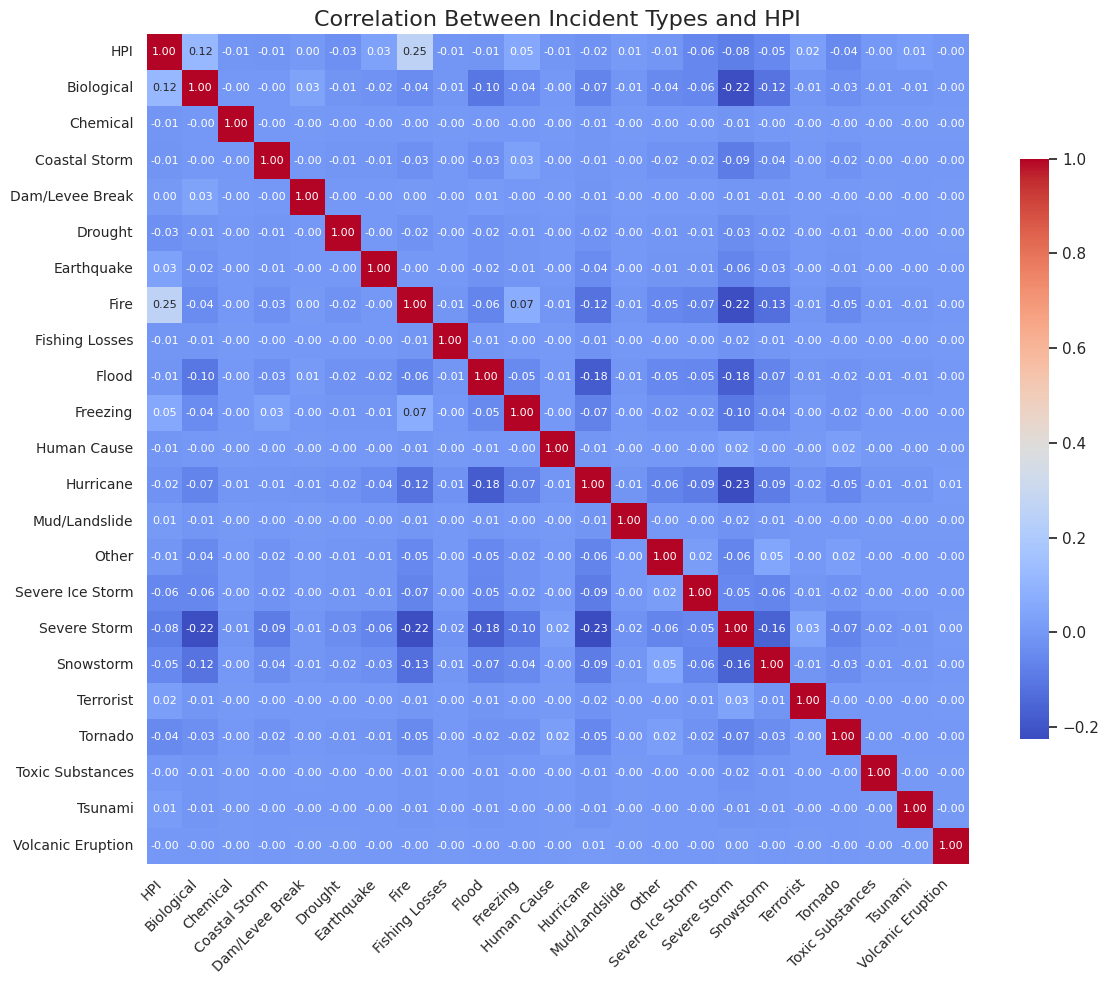

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: One-hot encode the 'incident_types' column
incident_types_encoded = fema_hpi_demo_df['incident_types'].str.get_dummies(sep=',')

# Step 2: Combine the one-hot encoded incident types with the 'HPI' column
hpi_incident_data = pd.concat([fema_hpi_demo_df['HPI'], incident_types_encoded], axis=1)

# Step 3: Compute the correlation matrix
correlation_matrix = hpi_incident_data.corr()

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Between Incident Types and HPI", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [210]:
# Alternatively study correlation between HPI and incident types by using full_encoded_df -- This is the same as above

# # Step 1: Identify the one-hot encoded incident type columns
# incident_type_columns = [col for col in full_encoded_df.columns if col.startswith('disaster_')]

# # Step 2: Select the 'HPI' column and the one-hot encoded incident type columns
# hpi_incident_data = full_encoded_df[['HPI'] + incident_type_columns]

# # Step 3: Compute the correlation matrix
# correlation_matrix = hpi_incident_data.corr()

# # Step 4: Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(
#     correlation_matrix,
#     annot=True,
#     cmap='coolwarm',
#     fmt=".2f",
#     annot_kws={"size": 8},
#     cbar_kws={"shrink": 0.7}
# )
# plt.title("Correlation Between Incident Types and HPI", fontsize=16)
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
# plt.show()


## 6.4 Random Forest Regression

### 6.4.1 Raw Random Forest Regresssion

In [223]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#  Drop rows with missing target
basic_df = full_encoded_df.dropna(subset=['HPI'])

# Select basic features (you can customize this to be minimal)
feature_cols = [
    col for col in basic_df.columns
    if col.startswith('disaster_') or col.endswith('_population_ratio') or col == 'disaster_count'
]

X = basic_df[feature_cols]
y = basic_df['HPI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic Random Forest — default params
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train, y_train)

# Predict & evaluate
y_pred = reg_rf.predict(X_test)

In [224]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 21014.69654825988
Mean Absolute Error (MAE): 86.09758808596435
Root Mean Squared Error (RMSE): 144.96446650217382
R² Score: 0.6235418402595645


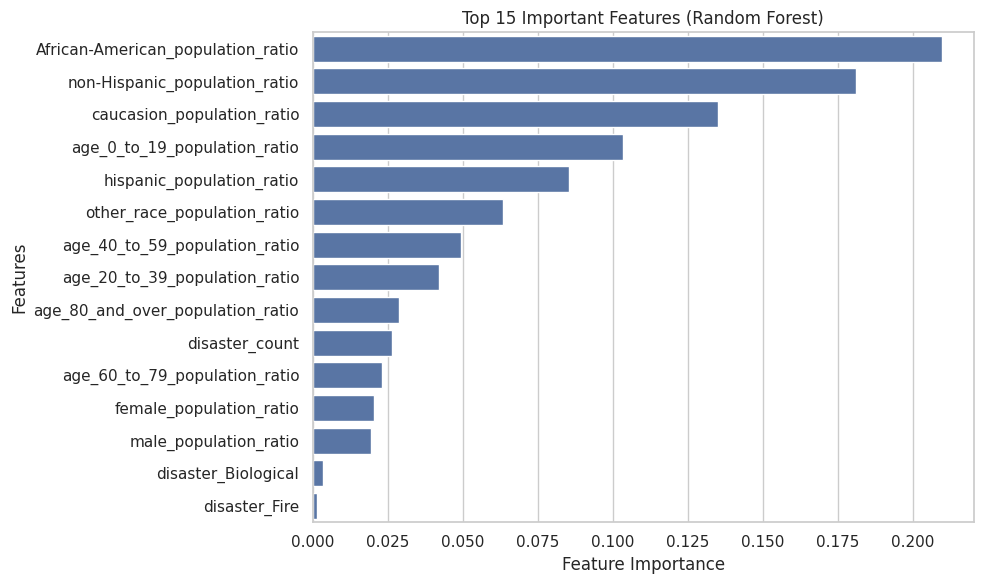

In [225]:
# Plot Feature Importance (Top 15)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importance = pd.Series(reg_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:15], y=feature_importance.index[:15])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### 6.4.2 Random Forest Regression with PCA

In [236]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = full_encoded_df.drop(columns=['HPI', 'zip_code', 'msa_name', 'county_name', 'state'])
y = full_encoded_df['HPI']

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)  # Choose the number of components to keep
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [237]:
# Make predictions and evaluate the model

y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



RMSE: 153.63
R² Score: 0.5772


### 6.4.3 Visual Check for HPI Skewness


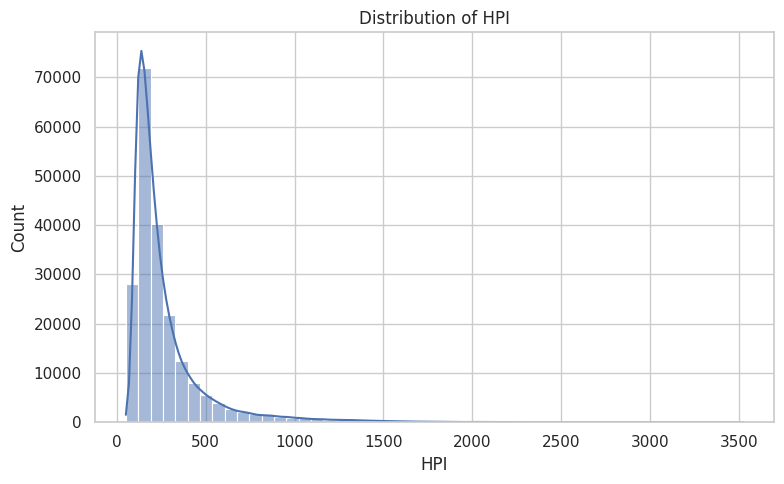

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(full_encoded_df['HPI'].dropna(), kde=True, bins=50)
plt.title("Distribution of HPI")
plt.xlabel("HPI")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [227]:
# Skew Metric

# Skewness Value	Interpretation
# ≈ 0	Symmetric/Normal
# > +1	Strong right skew
# < -1	Strong left skew
# ±0.5 to ±1	Moderate skew

skew_value = full_encoded_df['HPI'].dropna().skew()
print("Skewness of HPI:", skew_value)

Skewness of HPI: 3.4201107982549965


### 6.4.4 Model Improvement w. Hyperparameter Tunning & HPI Log (OPTIONAL)


In [231]:
# Improved Random Forest Regression (Time Consuming, Skipped)

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Drop rows with missing HPI
# rf_df = full_encoded_df.dropna(subset=['HPI'])

# # Log-transform HPI to reduce skewness
# rf_df['log_HPI'] = np.log1p(rf_df['HPI'])

# # Select features
# feature_cols = [
#     col for col in rf_df.columns
#     if col.startswith('disaster_') or col.endswith('_population_ratio') or col == 'disaster_count'
# ]
# X = rf_df[feature_cols]
# y = rf_df['log_HPI']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Hyperparameter grid
# # param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_depth': [10, 20, None],
# #     'min_samples_split': [2, 5],
# #     'min_samples_leaf': [1, 2]
# # }


# # Define a smaller hyperparameter grid
# param_grid_quick = {
#     'n_estimators': [100, 150],       # fewer options
#     'max_depth': [10, None],          # shallower or unlimited
#     'min_samples_split': [2],         # default only
#     'min_samples_leaf': [1, 2]        # still testing basic pruning
# }

# # Randomized search
# search = RandomizedSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_distributions=param_grid,
#     n_iter=3,
#     cv=2,
#     n_jobs=-1,
#     scoring='r2',
#     random_state=42
# )

# search.fit(X_train, y_train)
# best_model = search.best_estimator_

# # Predictions and evaluation
# y_pred = best_model.predict(X_test)

# print("Improved Random Forest Results:")
# print("MSE:", mean_squared_error(y_test, y_pred))
# print("MAE:", mean_absolute_error(y_test, y_pred))
# print("R²:", r2_score(y_test, y_pred))

# # Feature importance plot
# importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
# plt.figure(figsize=(10, 6))
# sns.barplot(x=importances.values[:15], y=importances.index[:15], palette="viridis")
# plt.title("Top 15 Feature Importances (Tuned Random Forest)")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.tight_layout()
# plt.show()


## 6.5 Linear Regression

### 6.5.1 Raw Linear Regression

In [228]:
# Linear Regression:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop rows with missing values in the features
model_df = full_encoded_df.dropna()

# Define features and target variable
X = model_df.drop(columns=['HPI', 'zip_code', 'msa_name', 'county_name', 'state'])
y = model_df['HPI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)


In [229]:
# Make predictions and evaluate the model

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression RMSE: 187.49
Mean Squared Error (MSE): 35153.79
Mean Absolute Error (MAE): 118.86
R² Score: 0.5739


### 6.5.2. Model Improvement w HPI Log

In [234]:
# Drop rows with missing values in the features
model_df = full_encoded_df.dropna()

# Define features and target variable (log of HPI)
X = model_df.drop(columns=['HPI', 'zip_code', 'msa_name', 'county_name', 'state'])
y = np.log(model_df['HPI'])  # Apply log transformation to the HPI

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the trained model
y_pred = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")



Linear Regression RMSE: 0.42
Mean Squared Error (MSE): 0.18
Mean Absolute Error (MAE): 0.33
R² Score: 0.5958


### 6.5.2 Model Improvement w. HPI Log and Reduced Features from Correlation Testing

In [233]:
# Define correlation threshold
correlation_threshold = 0.8  # Can adjust this threshold as needed

# Step 1: Get the correlation matrix (already have this from EDA 6.3.1)
correlation_matrix = correlation_data.corr()

# Step 2: Find highly correlated pairs and store the columns to drop
to_drop = set()  # Keep track of columns to drop
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Step 3: Drop the correlated columns from the dataset
model_df = full_encoded_df.drop(columns=to_drop)

# Step 4: Now you can define your features and target variable
X = model_df.drop(columns=['HPI', 'zip_code', 'msa_name', 'county_name', 'state'])
y = np.log(model_df['HPI'])  # Log-transform HPI as before

# Drop rows where either X or y has NaN
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop(columns=['HPI'])
y = combined['HPI']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train and evaluate the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression RMSE: 0.45
Mean Squared Error (MSE): 0.20
Mean Absolute Error (MAE): 0.36
R² Score: 0.5329


### 6.5.3 Model Improvement w. HPI Log and PCA


In [238]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Define features and target
X = full_encoded_df.drop(columns=['HPI', 'zip_code', 'msa_name', 'county_name', 'state'])
y = np.log(full_encoded_df['HPI'])  # Log-transform HPI

# Step 2: Drop rows with NaNs in X or y
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop(columns=['HPI'])
y = combined['HPI']

# Step 3: Standardize features (required before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
# Can set n_components to:
# - A number (e.g. 10), or
# - A float like 0.95 to keep 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count after PCA: {X_pca.shape[1]}")

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Train and evaluate model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

# Step 7: Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression (PCA) RMSE: {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Original feature count: 39
Reduced feature count after PCA: 29
Linear Regression (PCA) RMSE: 0.49
Mean Squared Error (MSE): 0.24
Mean Absolute Error (MAE): 0.38
R² Score: 0.4627


## 6.6 Ridge Regression with PCA

### 6.6.1 PCA with Ridge Regression on HPI Log

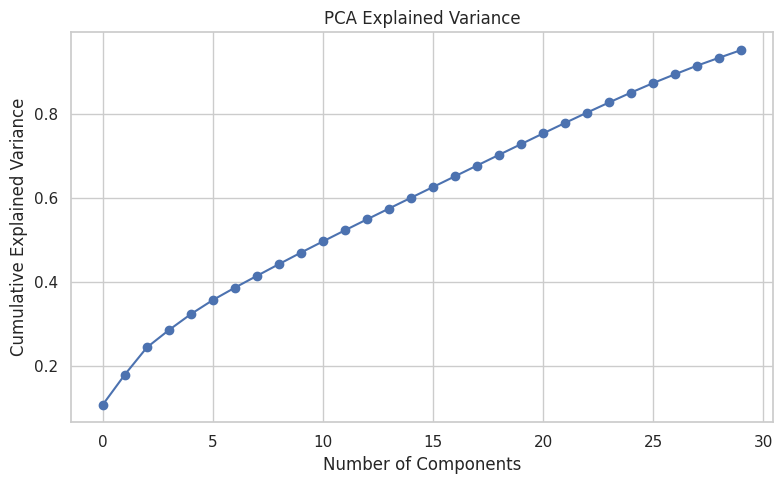

PCA + Ridge Regression on log(HPI):
Log-scale RMSE: 0.51
Log-scale R²: 0.2609

Back-transformed to original HPI scale:
RMSE: 211.33
MAE: 117.71
R²: 0.2000


In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Drop rows with missing HPI
pca_df = full_encoded_df.dropna(subset=["HPI"])

# Define features and log-transformed target
X = pca_df.drop(columns=["HPI", "zip_code", "msa_name", "county_name", "state"])
y = np.log(pca_df["HPI"])

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA: keep 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Ridge regression with cross-validation
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X_train, y_train)
y_pred_log = ridge_model.predict(X_test)

# Optional: transform predictions back to original scale
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred_log)

# Evaluation
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

rmse_orig = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
mae_orig = mean_absolute_error(y_test_exp, y_pred_exp)
r2_orig = r2_score(y_test_exp, y_pred_exp)

print("PCA + Ridge Regression on log(HPI):")
print(f"Log-scale RMSE: {rmse_log:.2f}")
print(f"Log-scale R²: {r2_log:.4f}")
print("\nBack-transformed to original HPI scale:")
print(f"RMSE: {rmse_orig:.2f}")
print(f"MAE: {mae_orig:.2f}")
print(f"R²: {r2_orig:.4f}")


## 6.7 Neural Network

### 6.7.1 Newural Network using HPI

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data
ml_df = full_encoded_df.dropna(subset=["HPI"])
X = ml_df.drop(columns=["HPI", "zip_code", "msa_name", "county_name", "state"])
y = ml_df["HPI"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [241]:
# MLP Regressor

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam', max_iter=300, random_state=42)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Neural Network (MLPRegressor) Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("R²:", r2_score(y_test, y_pred_mlp))


Neural Network (MLPRegressor) Results:
RMSE: 144.6934661471495
R²: 0.6249480460381327


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### 6.7.2 Neural Network using HPI Log

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Prepare data
ml_df = full_encoded_df.dropna(subset=["HPI"])
X = ml_df.drop(columns=["HPI", "zip_code", "msa_name", "county_name", "state"])
y = np.log(ml_df["HPI"])  # Log-transform the target

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize and train the neural network regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam', max_iter=300, random_state=42)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Neural Network (MLPRegressor) Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("R²:", r2_score(y_test, y_pred_mlp))


Neural Network (MLPRegressor) Results:
RMSE: 0.38383895030435955
R²: 0.5843901237334335


## 6.8 Model Performance Overall Summary

Despite our best efforts with log transformation, feature reduction, and PCA, various model results and their respecgtive explaination power in terms of R^2 are still generally low, which is frustrating. We come to realize that maybe below reasons could at play:



*   List item
*   List item

